# Encoding Model (GLMs) for population activity as a function of sensory and behavioral variables

In [1]:
# importing modules and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io_utils import *
from plotting_utils import *
from analysis_utils import * 
from pathlib import Path
import pickle
import scipy
import seaborn as sns
sns.set_context("talk")
colormap = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']


In [2]:
with open('../data/fully_labeled_traces_041824_nonznorm.pickle', 'rb') as handle:
    dict = pickle.load(handle)
print(dict.keys())


dict_keys(['29L_d1_balbc_t1', '29L_d1_balbc_t2', '29L_d1_balbc_t3', '29L_d1_obs_t1', '29L_d1_obs_t2', '29L_d1_obs_t3', '29L_d2_balbc_t1', '29L_d2_balbc_t2', '29L_d2_balbc_t3', '29L_d2_obs_t1', '29L_d2_obs_t2', '29L_d2_obs_t3', '29L_d3_balbc_t1', '29L_d3_balbc_t2', '29L_d3_balbc_t3', '29L_d3_obs_t1', '29L_d3_obs_t2', '29L_d3_obs_t3', '29L_d4_balbc_t1', '29L_d4_balbc_t2', '29L_d4_balbc_t3', '29L_d4_obs_t1', '29L_d4_obs_t2', '29L_d4_obs_t3', '29L_d5_balbc_t1', '29L_d5_balbc_t2', '29L_d5_balbc_t3', '29L_d5_obs_t1', '29L_d5_obs_t2', '29L_d5_obs_t3', '29L_d6_balbc_t1', '29L_d6_balbc_t2', '29L_d6_balbc_t3', '29L_d6_obs_t1', '29L_d6_obs_t2', '29L_d6_obs_t3', '29L_d7_balbc_t1', '29L_d7_balbc_t2', '29L_d7_balbc_t3', '29L_d7_obs_t1', '29L_d7_obs_t2', '29L_d7_obs_t3', '29L_d8_balbc_t1', '29L_d8_balbc_t2', '29L_d8_balbc_t3', '29L_d8_obs_t1', '29L_d8_obs_t2', '29L_d8_obs_t3', '29L_d9_OBSmCD1_t1', '29L_d9_OBSmCD1_t2', '29L_d9_OBSmCD1_t3', '29L_d9_mCD1_t1', '29L_d9_mCD1_t2', '29L_d9_mCD1_t3', '3095_d1

In [3]:
animalsAgg = ['29L','3095','3096','3097','30B','30L','30R2','4013','4014','4015','4016','91R2'] # list of all aniamls
# days = ['d1_balbc','d2_balbc','d3_balbc','d4_balbc','d5_balbc','d6_balbc','d7_balbc','d8_balbc','d9_mCD1'] # list of all days
animalsObs = ['29L','30R2','86L', '87L2'] # list of observer animals
# daysObs = ['d1_obs','d2_obs','d3_obs','d4_obsc','d5_obs','d6_obs','d7_obs','d8_obs','d9_OBSmCD1'] # list of all days for observer group
animalsToy = ['86L2', '87B', '87L','87R2']
# daysToy = []
# sessions = ['t1','t2','t3'] # session in each day
animalsAll = animalsAgg + animalsObs + animalsToy

In [4]:
print(check_exist(mouseId='29L', group='toy', path=None))

(False, PosixPath('/Volumes/Lenca_SSD/github/Falkner_Multi-region_Aggression/data/29L_toy_neural_data.csv'))


In [5]:
# with open('../data/29L_d1_balbc_t1_zscored_features.pickle', 'rb') as handle: # from cup folder 020924
#     dict = pickle.load(handle)
# df = pd.DataFrame(dict)
# df.head()
z = pd.read_parquet('../data/processed_features_020924_parquets/3095_d1_balbc_t1_zscored_features.parquet')
z.head()

# CHECK WITH JORGE THAT FPS=40

resident tti2head  resident tti2trunk  resident tti2neck  \
0           2.113413            1.614619           2.058559   
1           2.115208            1.615705           2.060196   
2           2.118729            1.617847           2.063406   
3           2.123840            1.620985           2.068067   
4           2.130342            1.625035           2.074002   

   resident tti2centroid  resident head2nose  resident trunk2head  \
0               2.603204           -0.178948             2.569558   
1               2.603248           -0.177038             2.569362   
2               2.603290           -0.173242             2.568899   
3               2.603236           -0.167606             2.568027   
4               2.602955           -0.160195             2.566545   

   resident forepaw left2head  resident forepaw right2head  \
0                    1.727065                     1.579520   
1                    1.723661                     1.578406   
2                    1.716860                     1.576147   
3                    1.706681                     1.572685   
4                    1.693149                     1.567937   

   resident forepaw left2trunk  resident forepaw right2trunk  ...  \
0                     0.617982                     -0.584120  ...   
1                     0.618196                     -0.582164  ...   
2                     0.618632                     -0.578295  ...   
3                     0.619306                     -0.572599  ...   
4                     0.620245                     -0.565198  ...   

   resident2intruder nose-centroid mean across lags  \
0                                         -1.338892   
1                                         -1.338647   
2                                         -1.338159   
3                                         -1.337433   
4                                         -1.336476   

   resident2intruder nose-centroid median across lags  \
0                                          -1.207235    
1                                          -1.206490    
2                                          -1.205012    
3                                          -1.202831    
4                                          -1.199987    

   resident2intruder nose-centroid sum across lags  \
0                                        -1.338892   
1                                        -1.338647   
2                                        -1.338159   
3                                        -1.337433   
4                                        -1.336476   

   intruder2resident nose-centroid mean across lags  \
0                                         -1.137748   
1                                         -1.137235   
2                                         -1.136214   
3                                         -1.134694   
4                                         -1.132690   

   intruder2resident nose-centroid median across lags  \
0                                          -0.974535    
1                                          -0.972901    
2                                          -0.969670    
3                                          -0.964912    
4                                          -0.958728    

   intruder2resident nose-centroid sum across lags  \
0                                        -1.137748   
1                                        -1.137235   
2                                        -1.136214   
3                                        -1.134694   
4                                        -1.132690   

   intruder2resident nose-tti mean across lags  \
0                                    -1.184827   
1                                    -1.184122   
2                                    -1.182719   
3                                    -1.180631   
4                                    -1.177879   

   intruder2resident nose-tti median across lags  \
0                                      -1.104307   
1                 

In [6]:
animal = '29L'
df = load_and_wrangle(mouseId=animal, path=None, overwrite=False) # load csv for animal

In [10]:
X_all, _, _ = get_design_X_GLM_features(animal='29L', group='agg', features=['proximity'], Nbins=10, path=None)

In [9]:
# !!! angles only go to 180 so no circular features for now 
featuresShortlist = ["proximity","resident centroid roc 500 ms", "intruder centroid roc 500 ms",'resident2intruder head-head', 'resident2intruder head-tti','resident2intruder head2head angle', 'resident2intruder head2tti angle', "intruder2resident head2centroid angle"]
circularShortlist = [0, 0, 0, 0, 0, 0, 0, 0] 
featuresLonglist = ["proximity","resident centroid roc 500 ms", "intruder centroid roc 500 ms", 'resident2intruder head-head', 'resident2intruder head-tti','resident2intruder head2head angle', 'resident2intruder head2tti angle', "intruder2resident head2centroid angle",
   "resident tti2head", "intruder tti2head", "resident tailbase2head angle", "intruder tailbase2head angle"] # potentially add more
circularLonglist = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

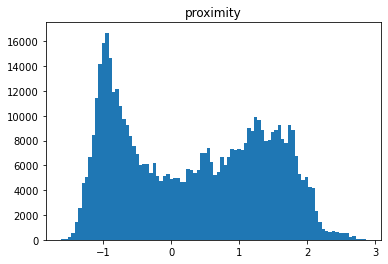

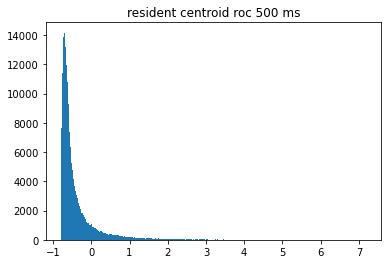

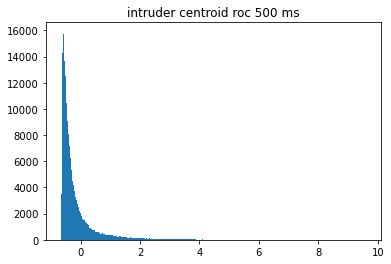

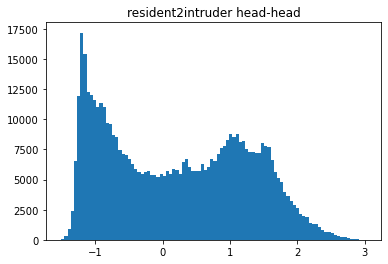

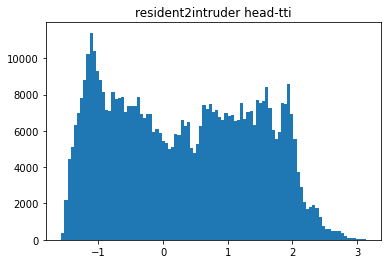

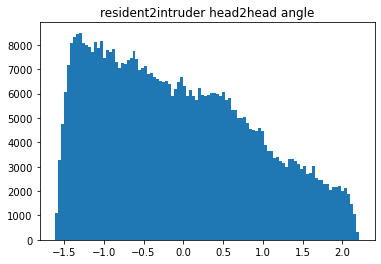

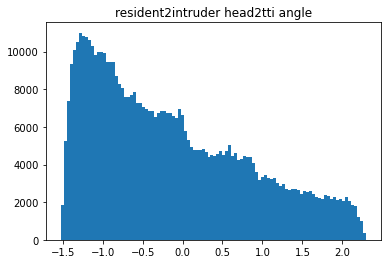

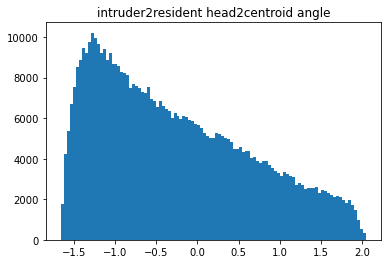

In [ ]:
# histogram_feature(animal, features=featuresShortlist, path=None)

In [14]:
regions = get_regions_dataframe(df) # get recorded regions from dataframe
print(regions)

['PrL (E)', 'PrL (I)', 'vLS (E)', 'vLS (I)', 'POA (E)', 'POA (I)', 'AH (E)', 'AH (I)', 'MeA (E)', 'MeA (I)', 'VMH (E)', 'VMH (I)', 'NAc (DA)']


In [47]:
X_all, X, bin_centers = get_design_X_GLM_features(animal, features=[featuresShortlist[1]], Nbins=5)
region = 'POA (I)'
Y_all, Y = get_output_Y_GLM(animal, region, path=None)

print(X_all.shape)
print(Y_all.shape)

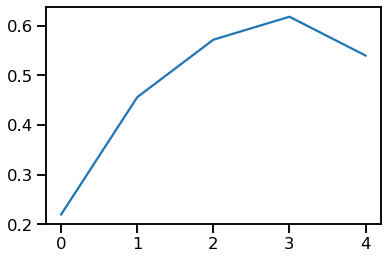

0.30660067339253716


In [49]:
w_hat = solution_linear_Gaussian_smoothing(X_all, Y_all, feature_start=[0, 1], circular=[0,0], alpha=10) # bias + one tuning curve
plt.plot(w_hat[1:])
plt.show()

print(mse(X_all, Y_all, w_hat))

In [10]:
featuresInterest_index = [0,1,2,3,5] # out of all  indices in feature Shortlist

In [11]:
animal = '29L'
region = 'POA (I)'
alpha_values = [0.1,100,10000] #[10**x for x in range(-3,7)] 
Nbin_values = [8] #[2**x for x in range(3,7)]
W_map, train_mse, test_mse = fit_KFold_linear_Gaussian_smoothing(animal, [featuresShortlist[0]], [circularShortlist[0]], region, Nbin_values, alpha_values, K=K, blocks=400, path=None)
# fit_CV_linear_Gaussian_smoothing(animal=animal, features=[featuresShortlist[ind]], region=region, Nbin_values=Nbin_values, alpha_values=alpha_values, path=data_path) 

In [ ]:
# Checking if linear nonlinearity works well

In [ ]:
# MSE among cluster fits for particular animal
animal = '29L'
df = load_and_wrangle(animal)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in range(-3,7)] 
Nbin_values = [2**x for x in range(3,7)]
K = 5

for region in regions:
    fits = np.load(f'../data/{animal}/{animal}_KFold={K}_MAP-estimation_region={region}.npz', allow_pickle=True)
    W_map = fits['W_map']
    train_mse = fits['train_mse']
    test_mse = fits['test_mse']


    fig, axes = plt.subplots(nrows=1,ncols=len(featuresInterest_index), figsize=(35,5))
    axes[0].set_ylabel('MSE')

    for feature_ind in range(len(featuresInterest_index)): #range(len(featuresShortlist)):

        for Nbin_ind in range(len(Nbin_values)):
            best_ind = np.argmin(np.mean(test_mse[featuresInterest_index[feature_ind], Nbin_ind, :],axis=0))

            axes[feature_ind].scatter(np.log10(alpha_values[best_ind]), np.mean(test_mse[featuresInterest_index[feature_ind], Nbin_ind, :],axis=0)[best_ind], color=colormap[Nbin_ind])
            axes[feature_ind].plot(np.log10(alpha_values), np.mean(test_mse[featuresInterest_index[feature_ind], Nbin_ind, :],axis=0), label=f'test Nbin={Nbin_values[Nbin_ind]}', color=colormap[Nbin_ind])
            # axes[feature_ind].plot(np.log10(alpha_values), train_mse[featuresInterest_index[feature_ind], Nbin_ind, :],  linestyle='dashed')
            axes[feature_ind].set_xlabel('log 10 alpha value')
            axes[feature_ind].legend()
            axes[feature_ind].set_title(featuresShortlist[featuresInterest_index[feature_ind]]) 

    fig.suptitle(str(region), size=25, y=1.02)
    plt.show()

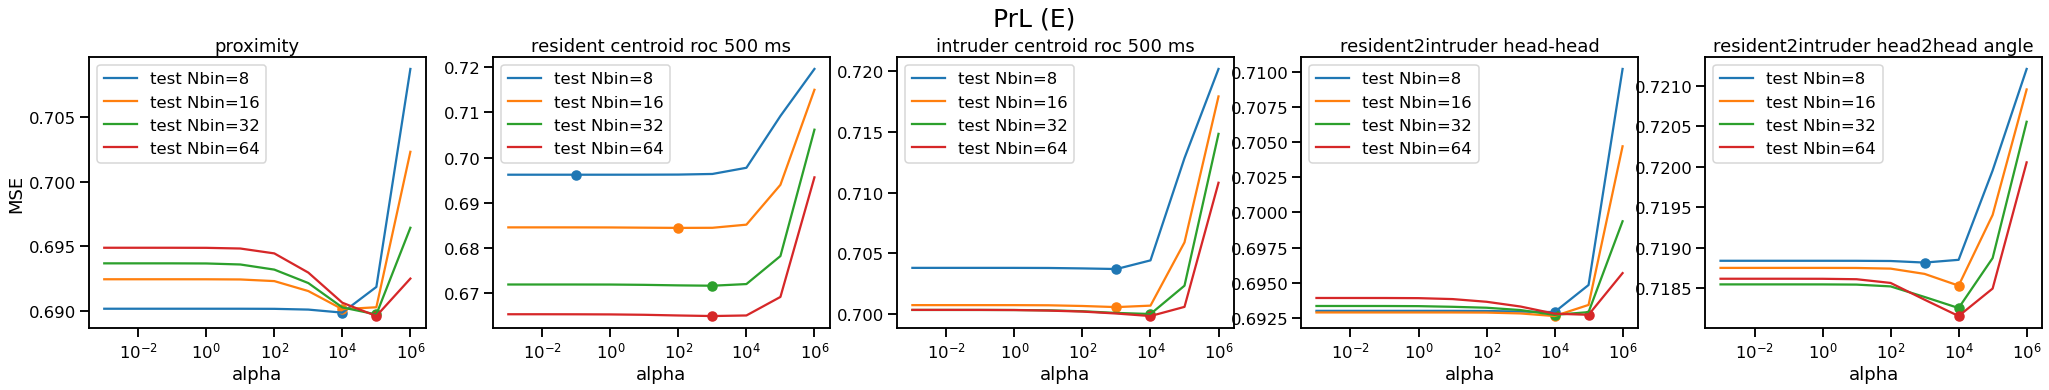

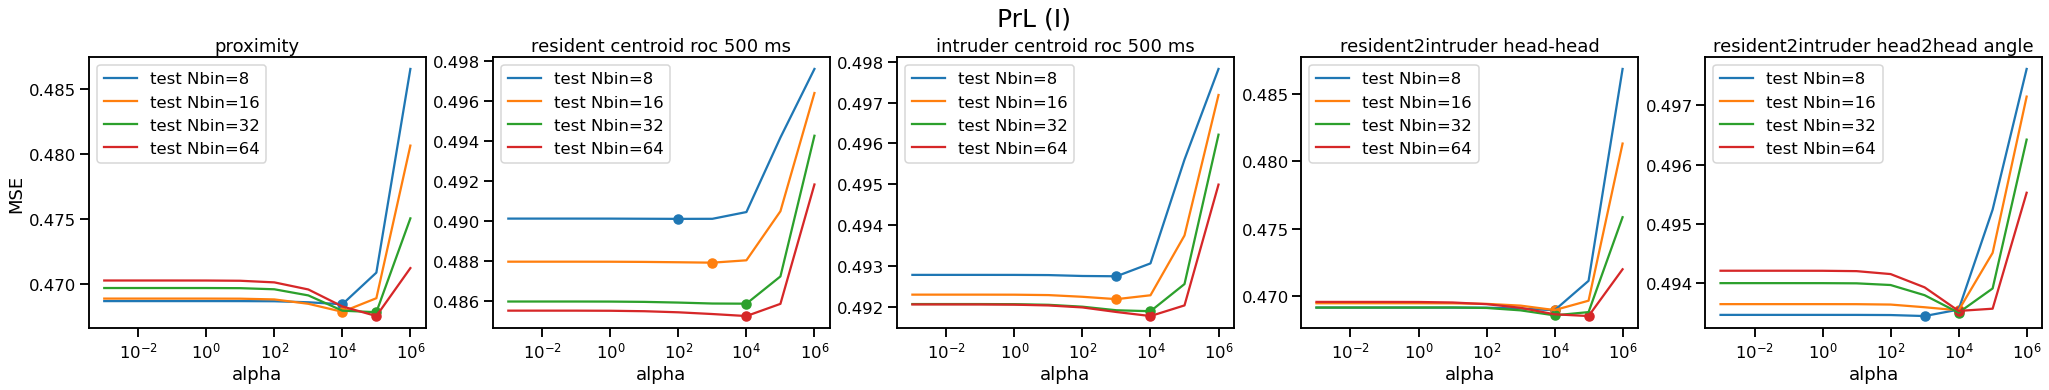

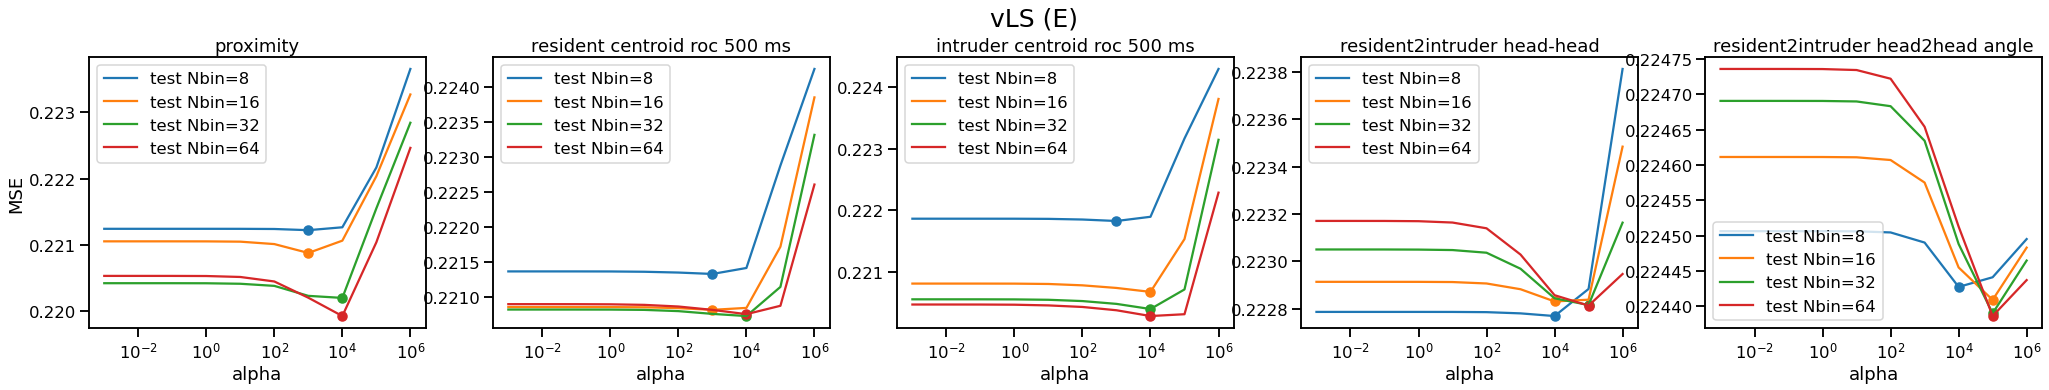

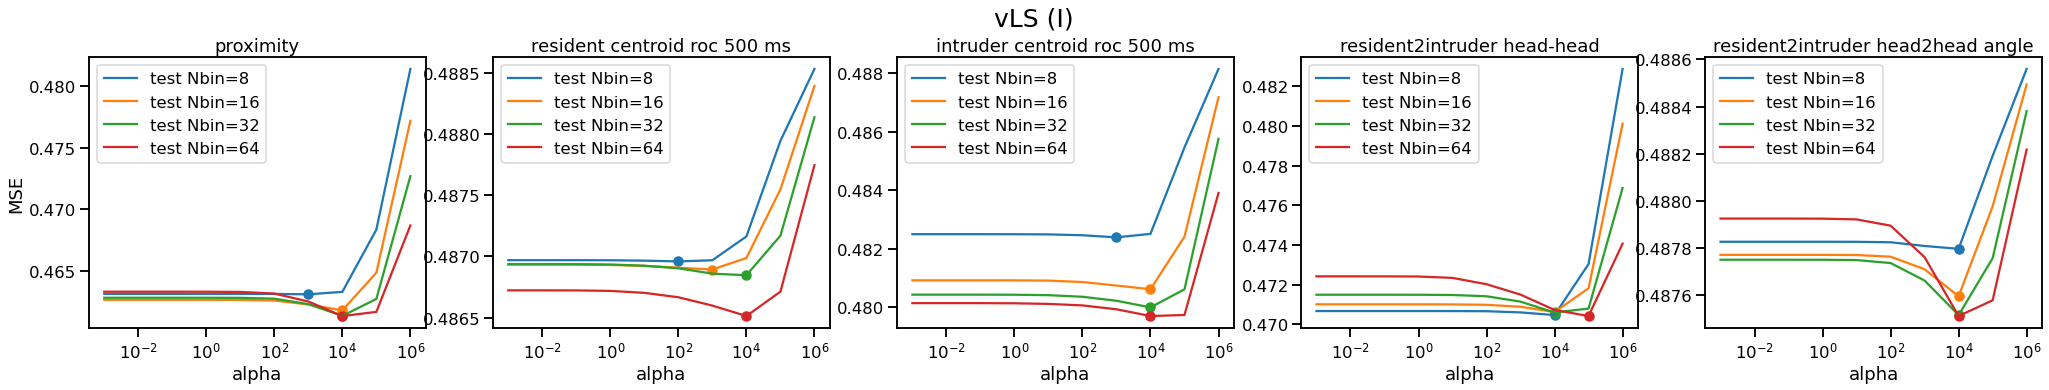

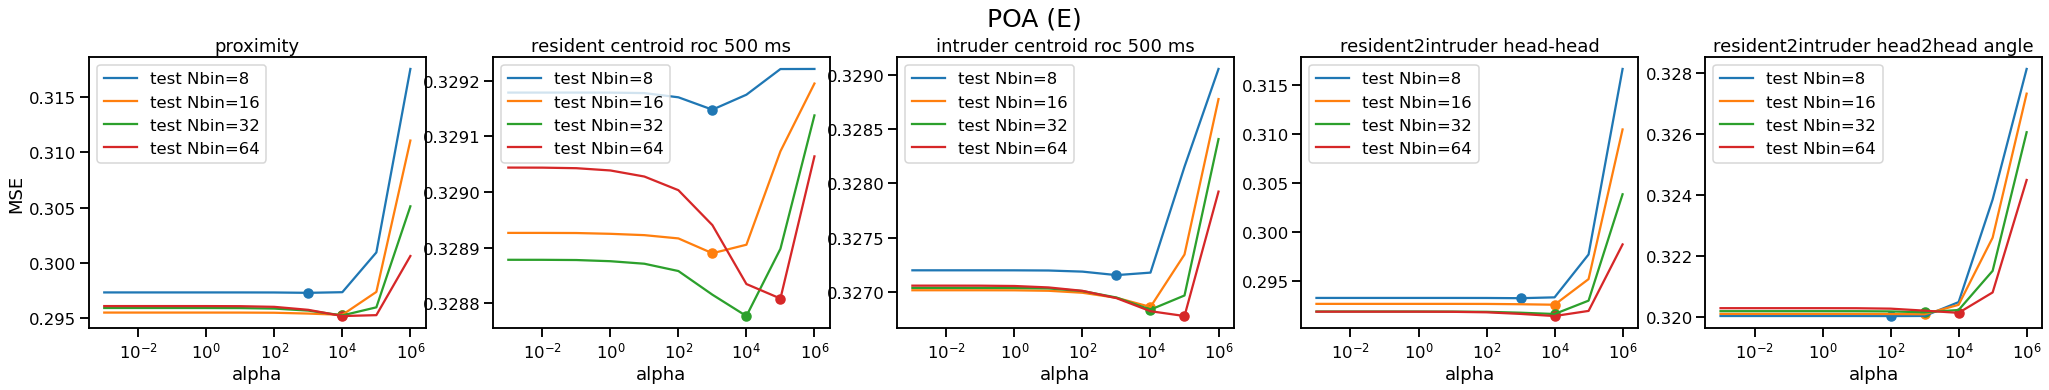

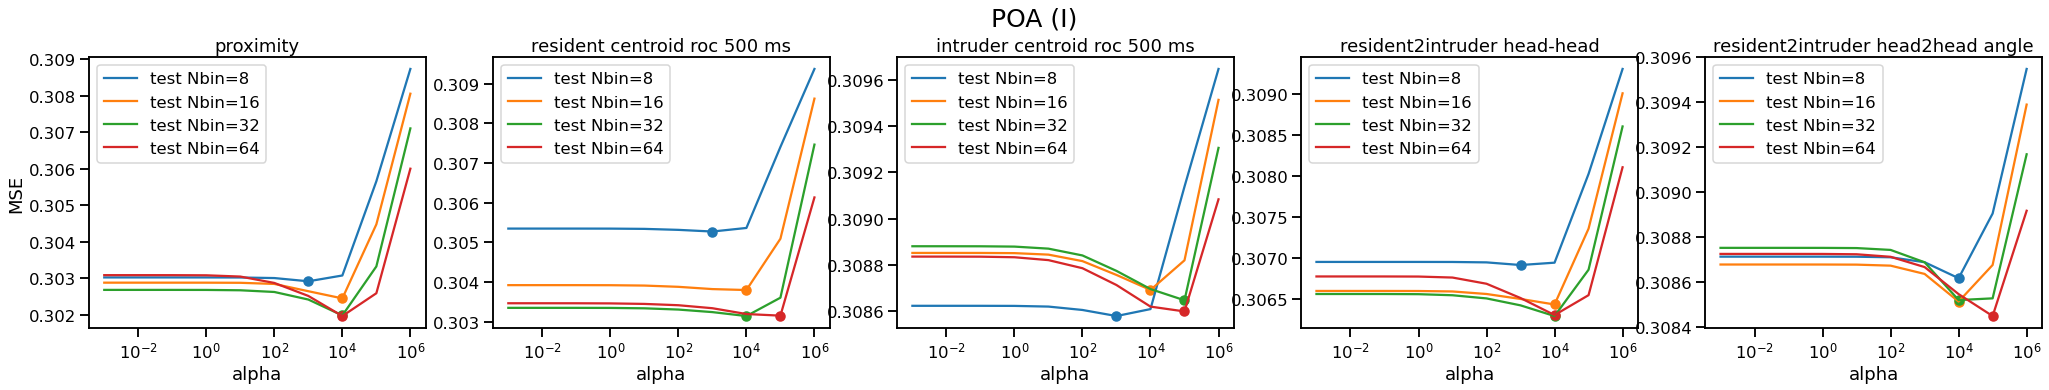

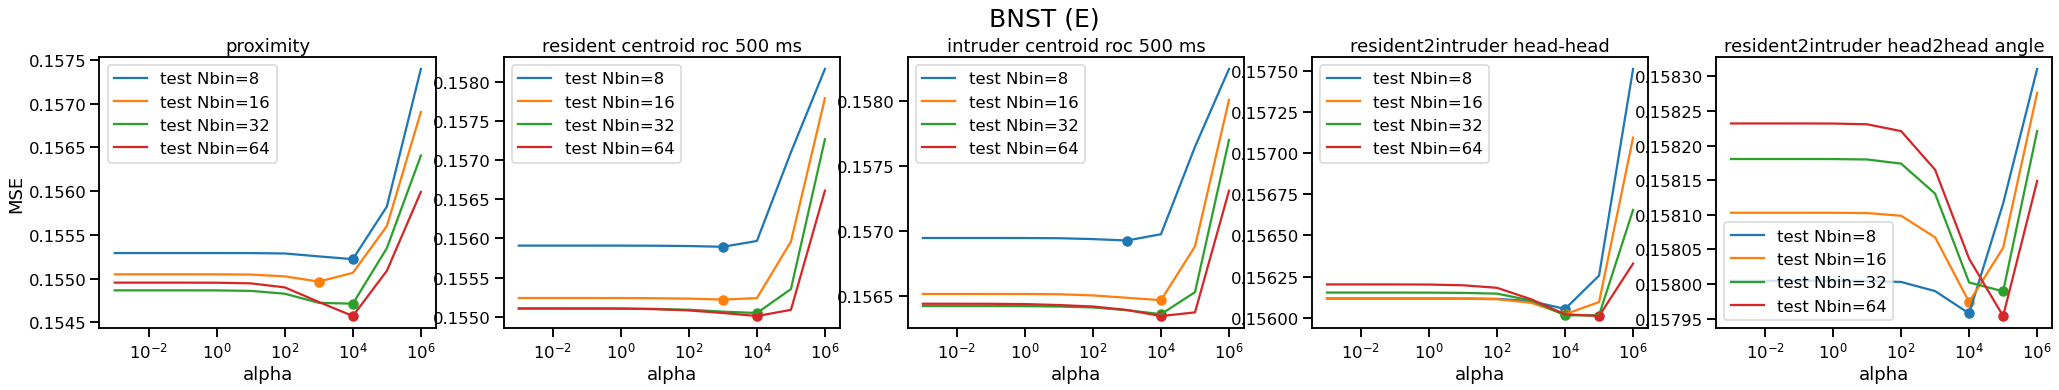

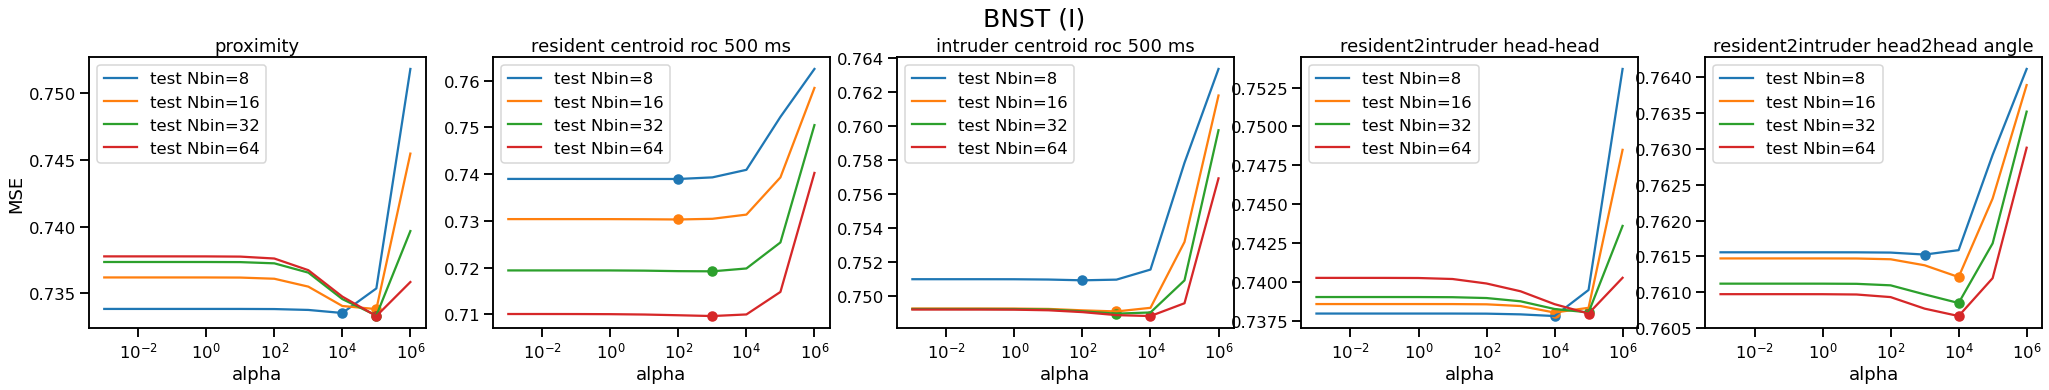

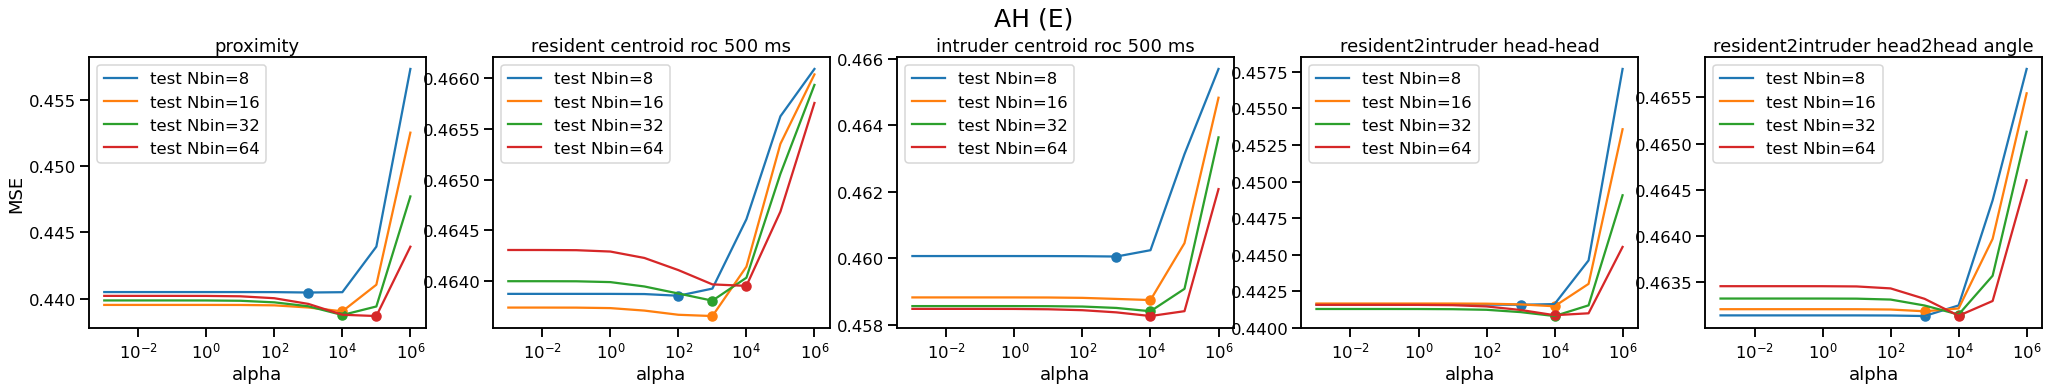

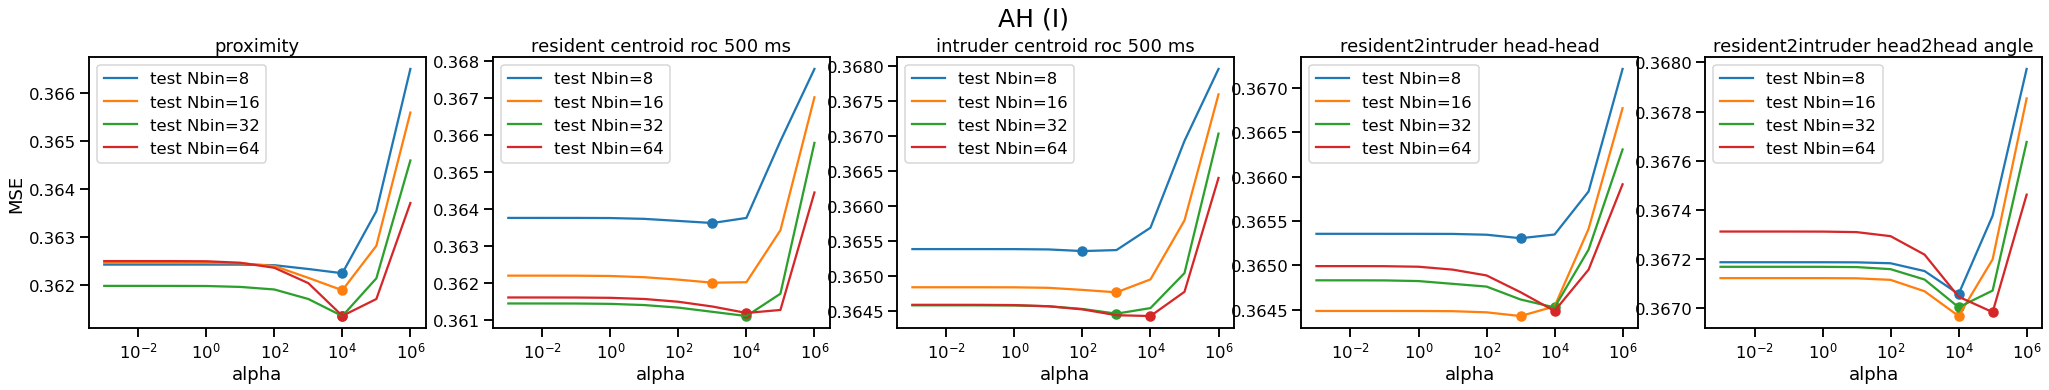

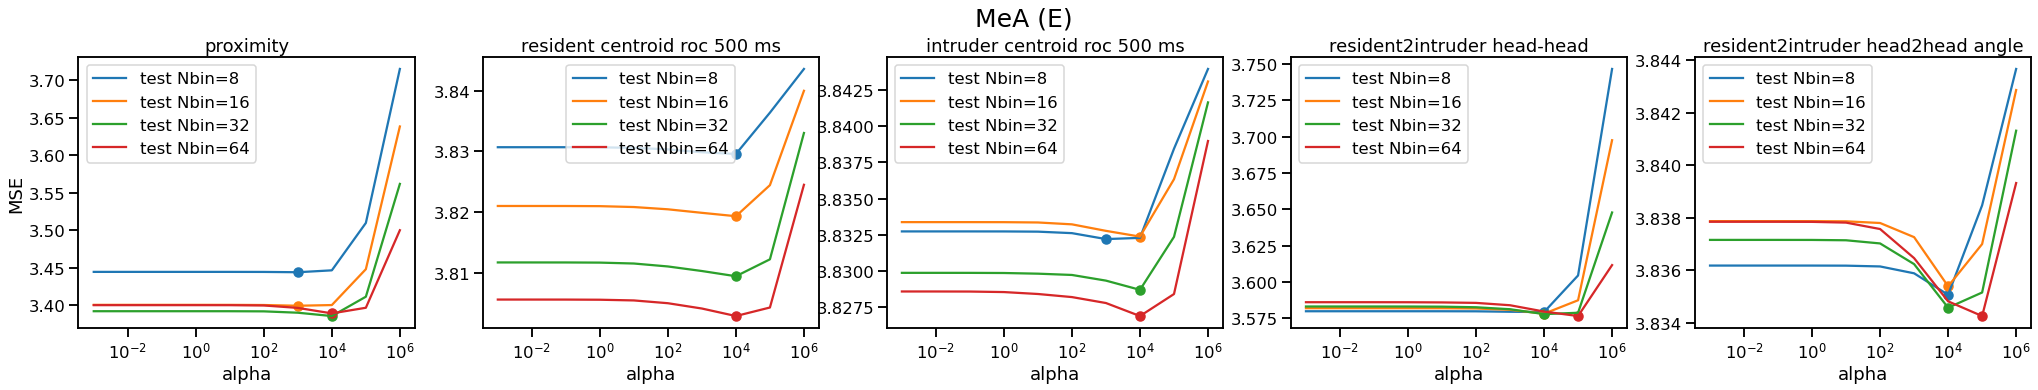

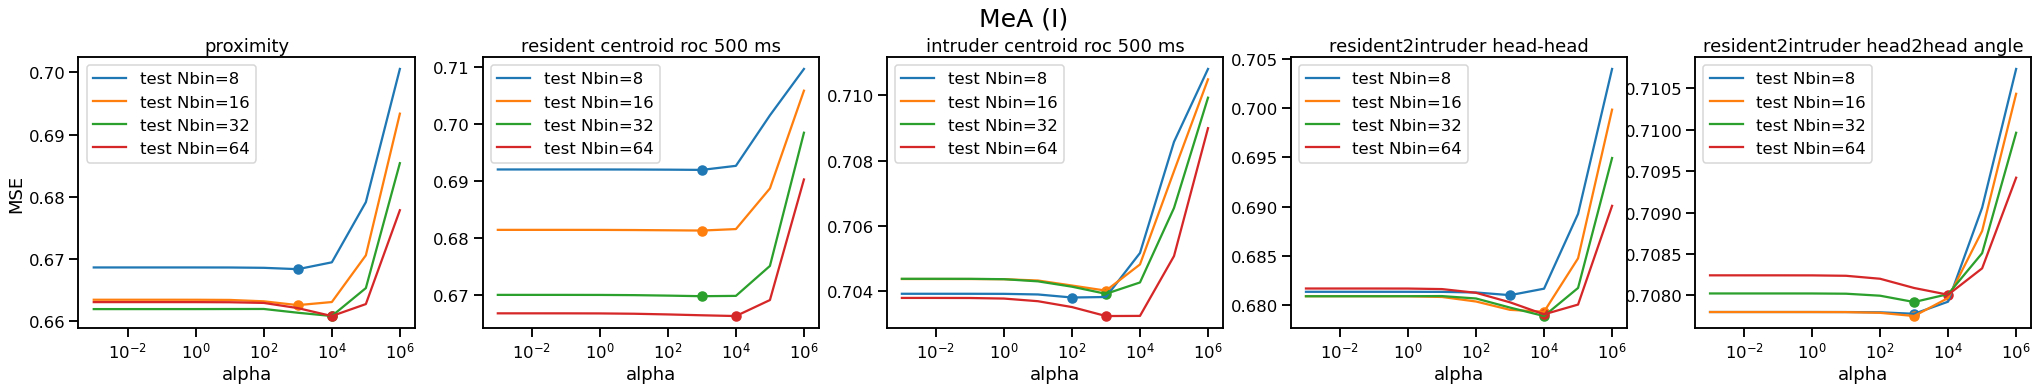

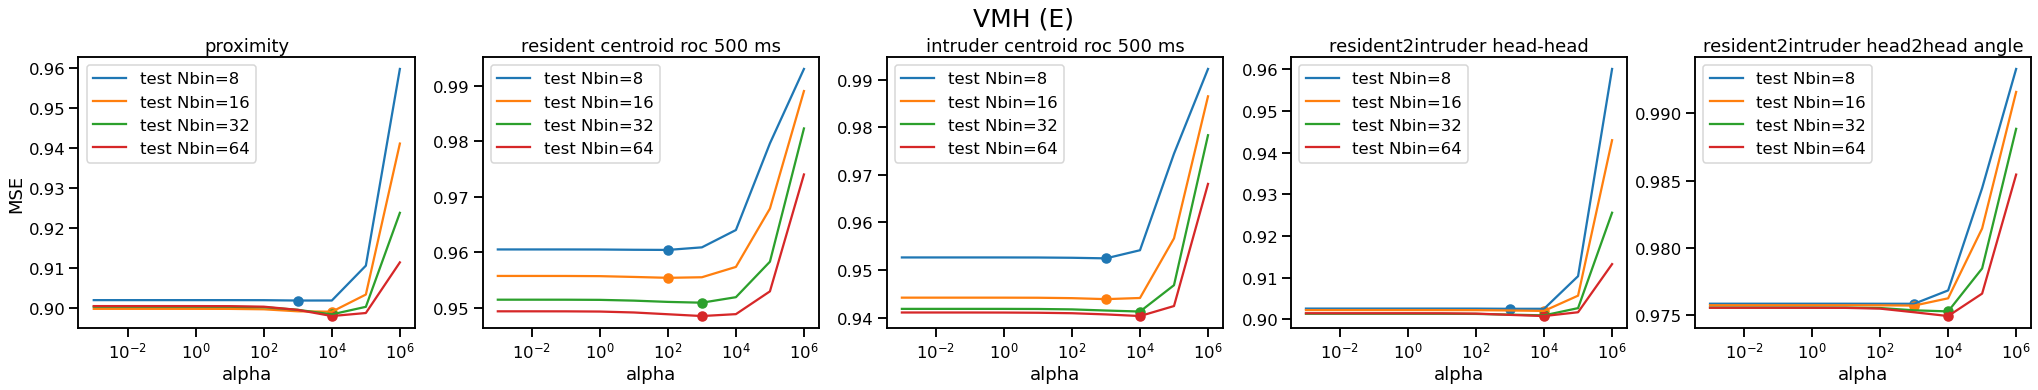

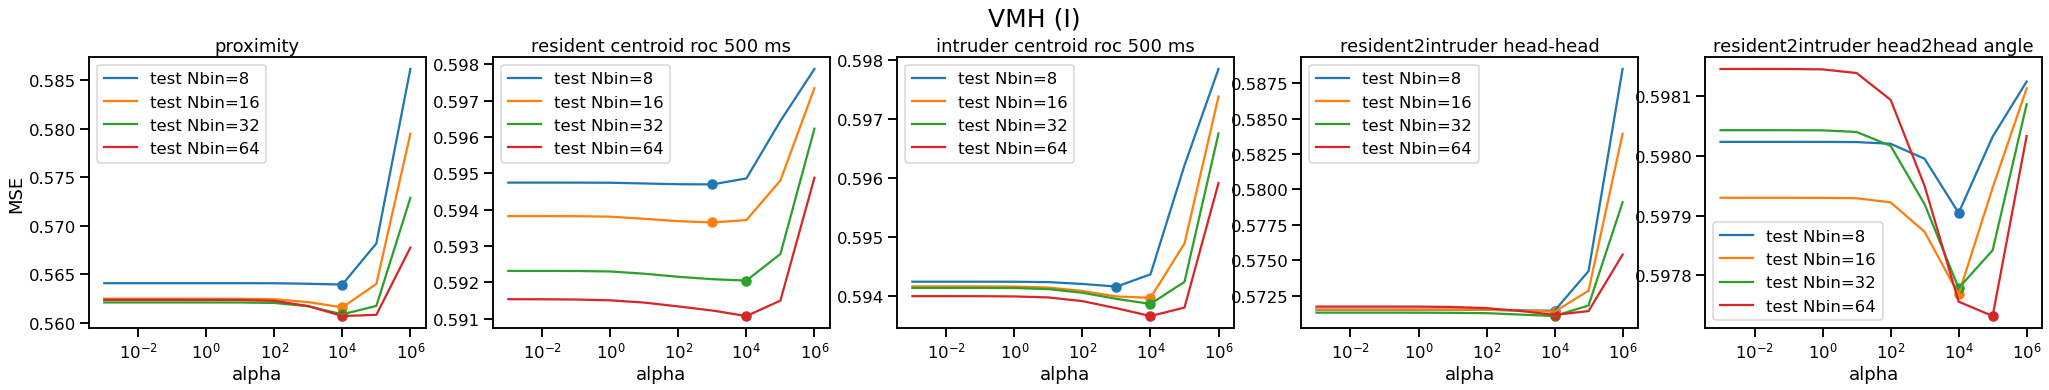

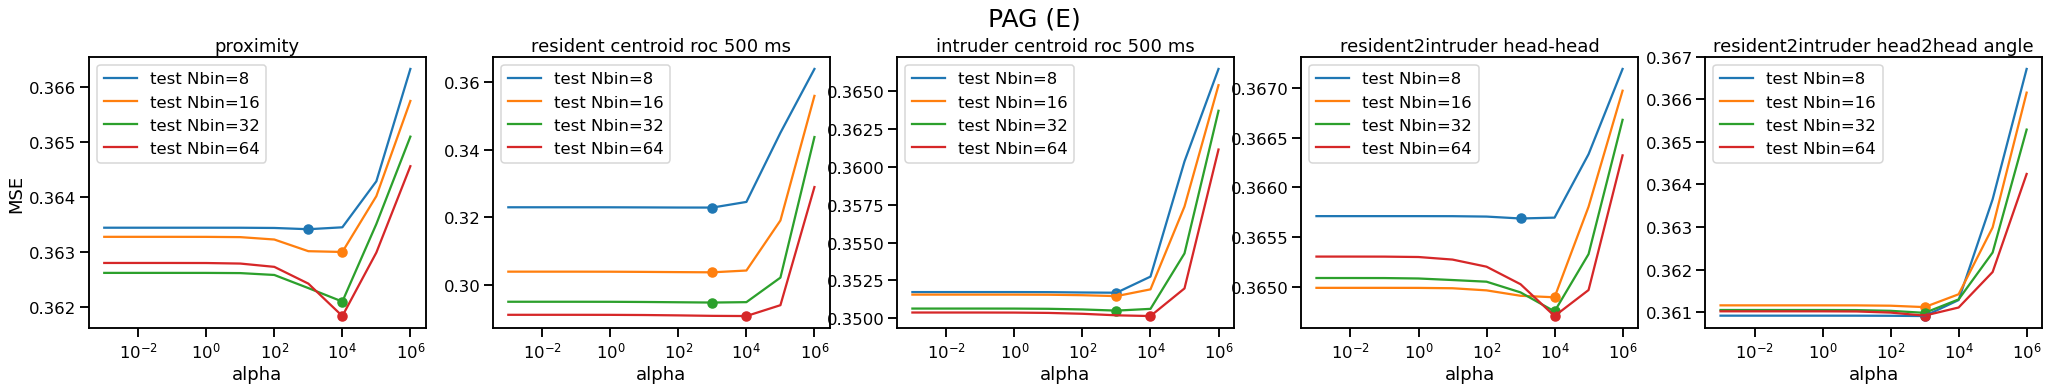

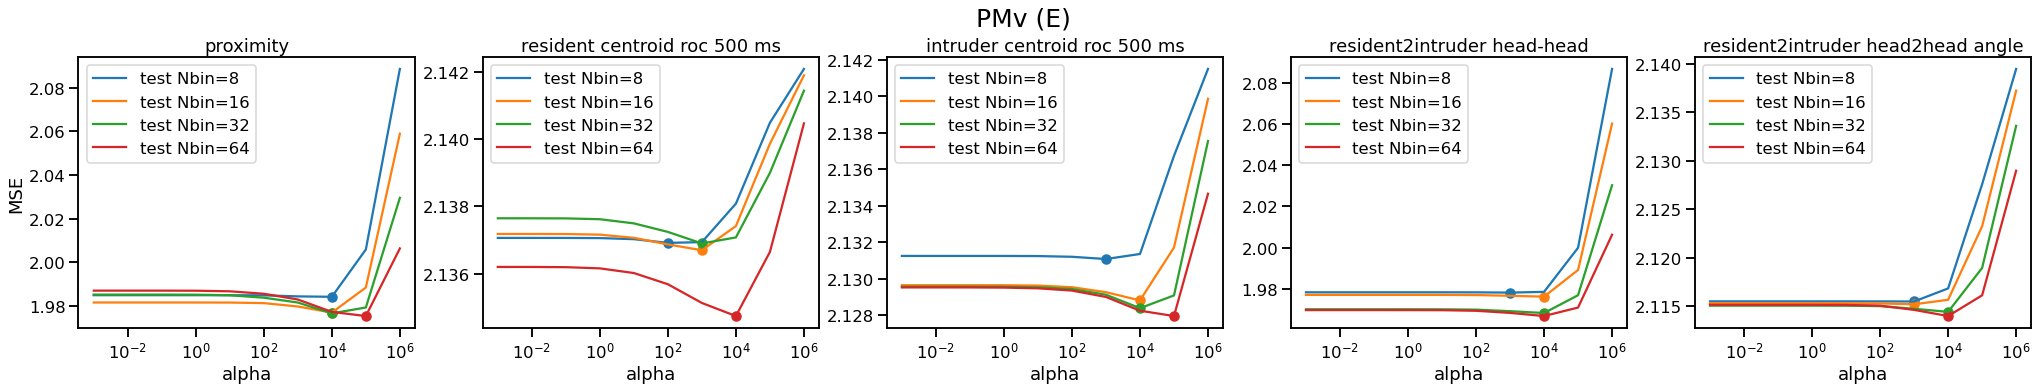

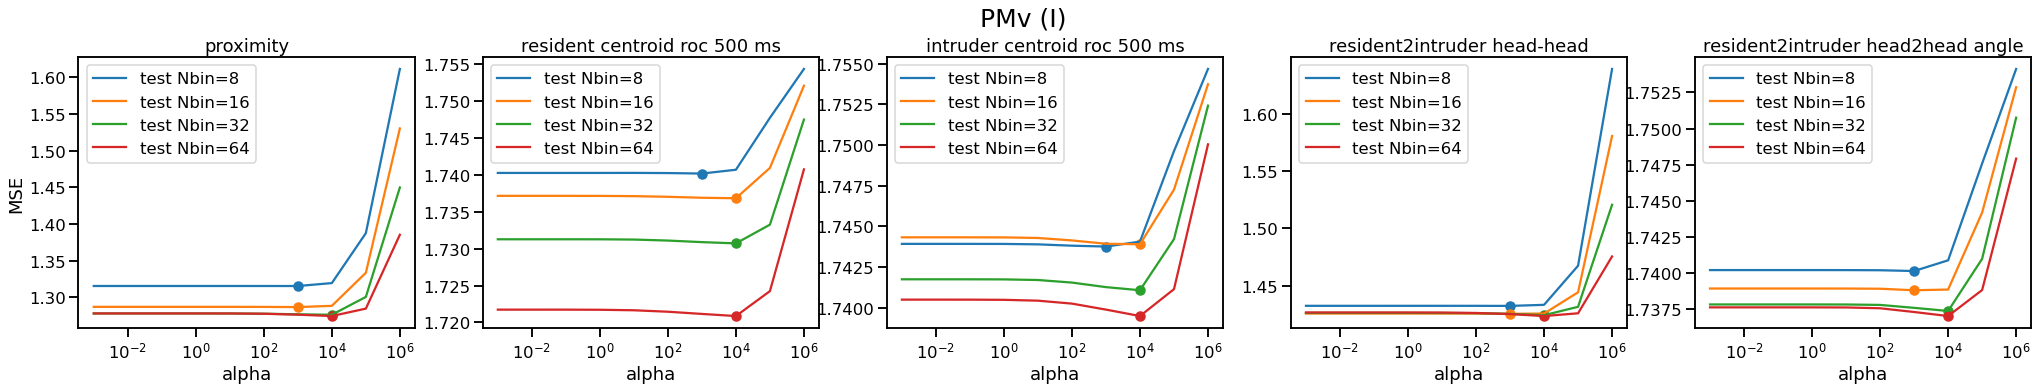

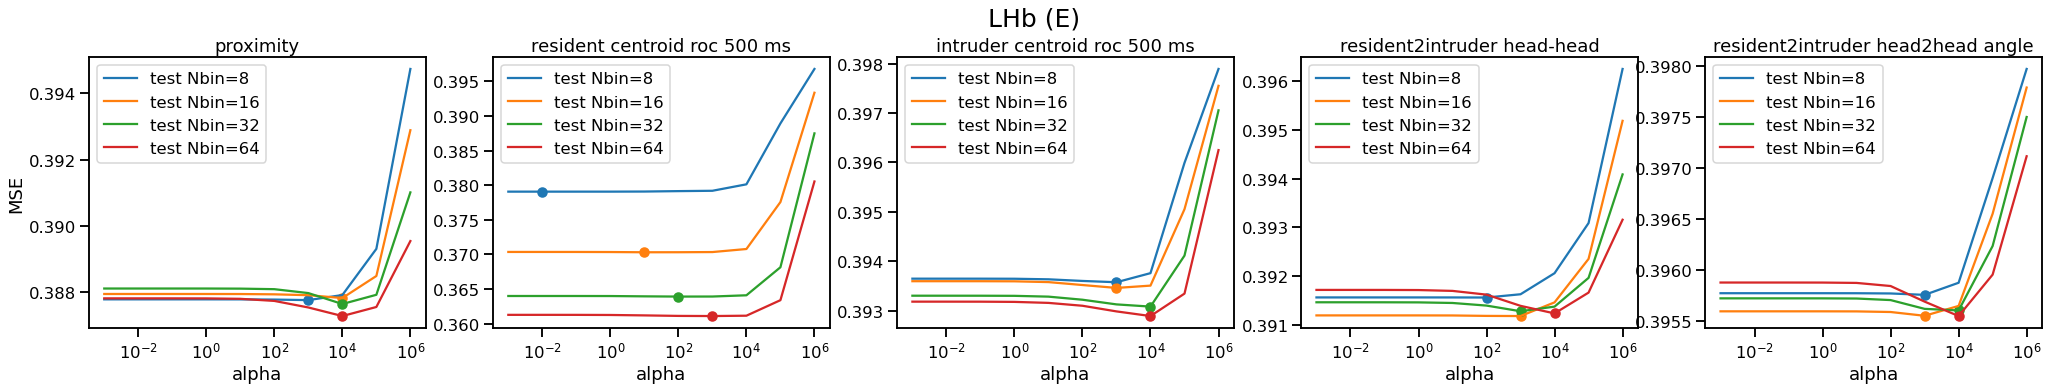

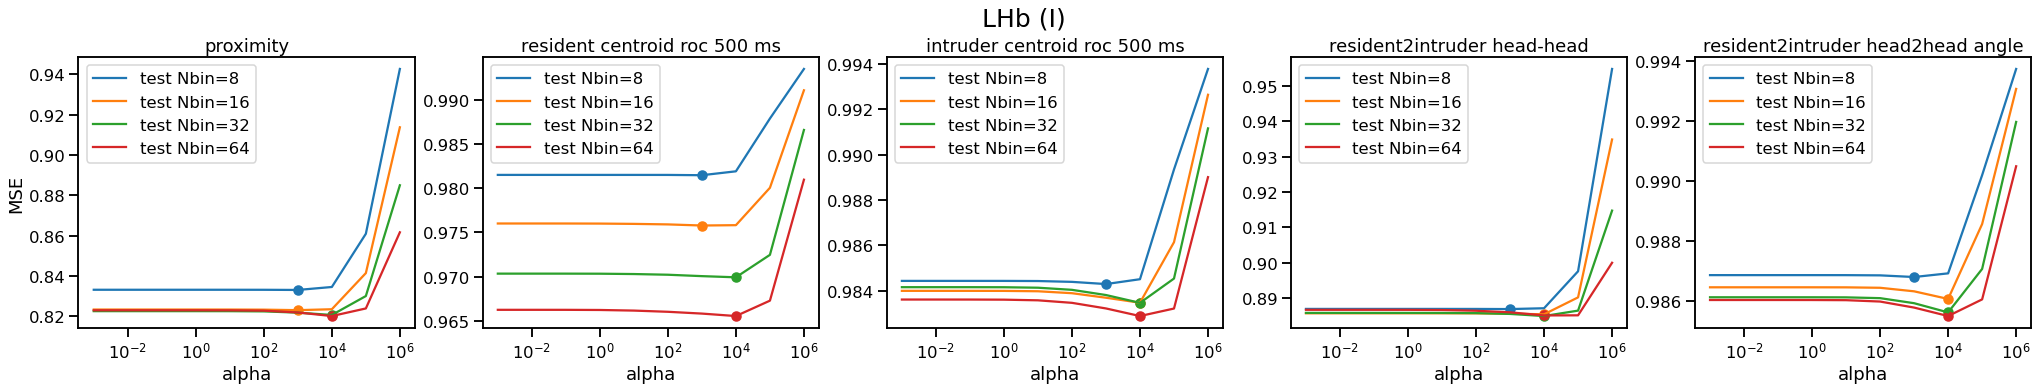

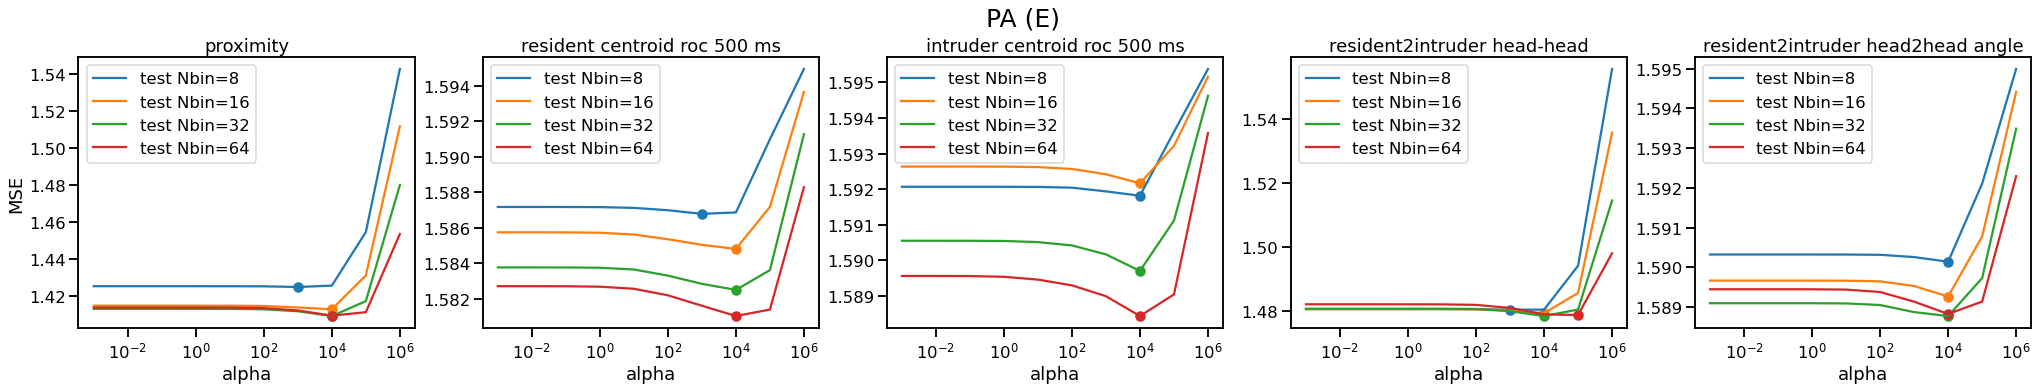

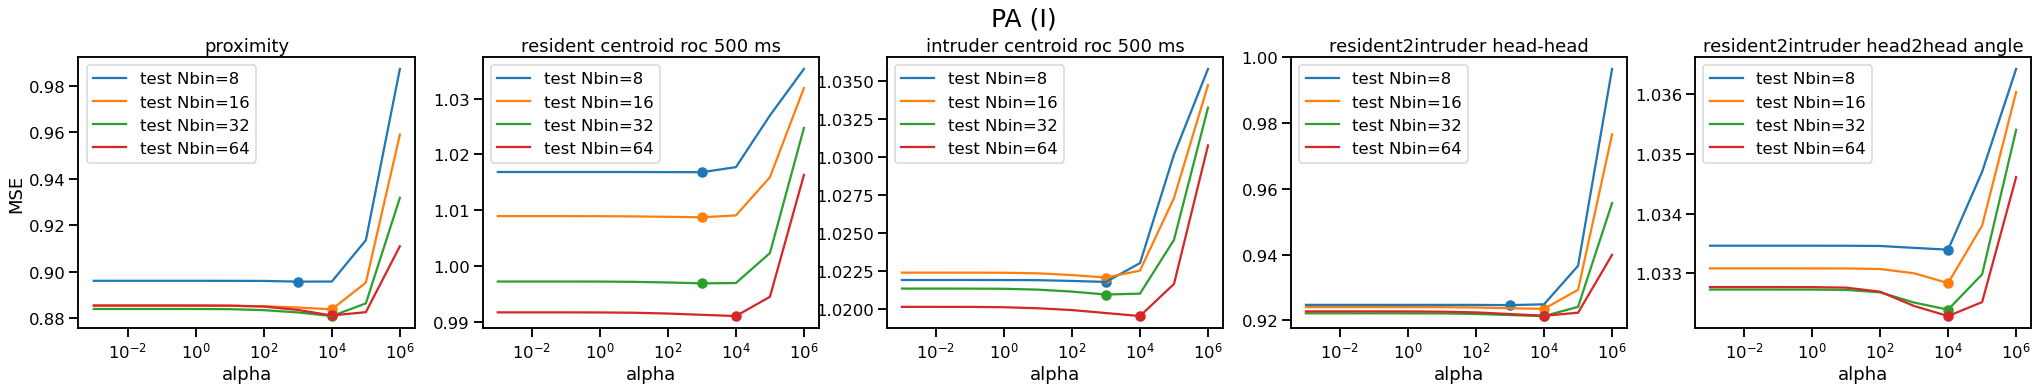

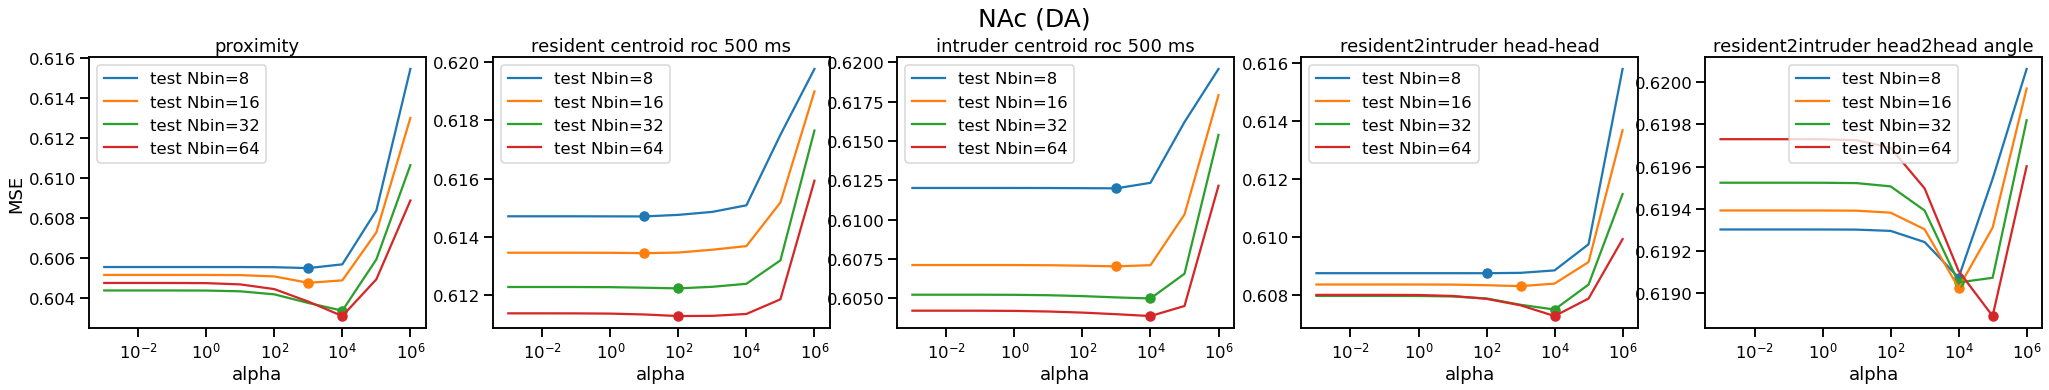

In [11]:
# MSE among cluster fits for particular animal
animal = '29L'
df = load_and_wrangle(animal)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in range(-3,7)] 
Nbin_values = [2**x for x in range(3,7)]
K = 5

for region in regions:
    fits = np.load(f'../data/{animal}/{animal}_KFold={K}_MAP-estimation_region={region}.npz', allow_pickle=True)
    W_map = fits['W_map']
    train_mse = fits['train_mse']
    test_mse = fits['test_mse']


    fig, axes = plt.subplots(nrows=1,ncols=len(featuresInterest_index), figsize=(7 * len(featuresInterest_index), 5))
    axes[0].set_ylabel('MSE')

    for feature_ind in range(len(featuresInterest_index)): #range(len(featuresShortlist)):

        for Nbin_ind in range(len(Nbin_values)):

            train_mse_mean = np.mean(train_mse[featuresInterest_index[feature_ind], :, Nbin_ind, :], axis=0)
            test_mse_mean = np.mean(test_mse[featuresInterest_index[feature_ind], :, Nbin_ind, :], axis=0)
            best_ind = np.argmin(test_mse_mean)
            

            axes[feature_ind].scatter(alpha_values[best_ind], test_mse_mean[best_ind], color=colormap[Nbin_ind])
            axes[feature_ind].plot(alpha_values, test_mse_mean, label=f'test Nbin={Nbin_values[Nbin_ind]}', color=colormap[Nbin_ind])
            # axes[feature_ind].plot(alpha_values, train_mse_mean,  linestyle='dashed')
            axes[feature_ind].set_xlabel('alpha')
            axes[feature_ind].set_xscale('log')
            axes[feature_ind].legend()
            axes[feature_ind].set_title(featuresShortlist[featuresInterest_index[feature_ind]]) 

    fig.suptitle(str(region), size=25, y=1.02)
    plt.show()

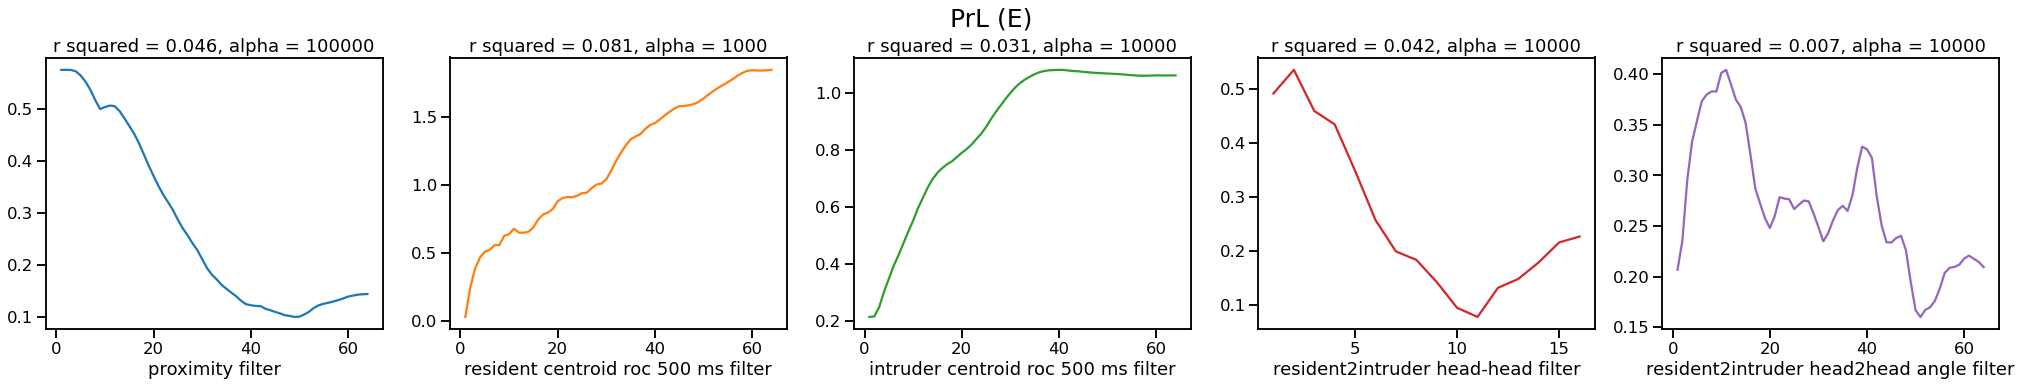

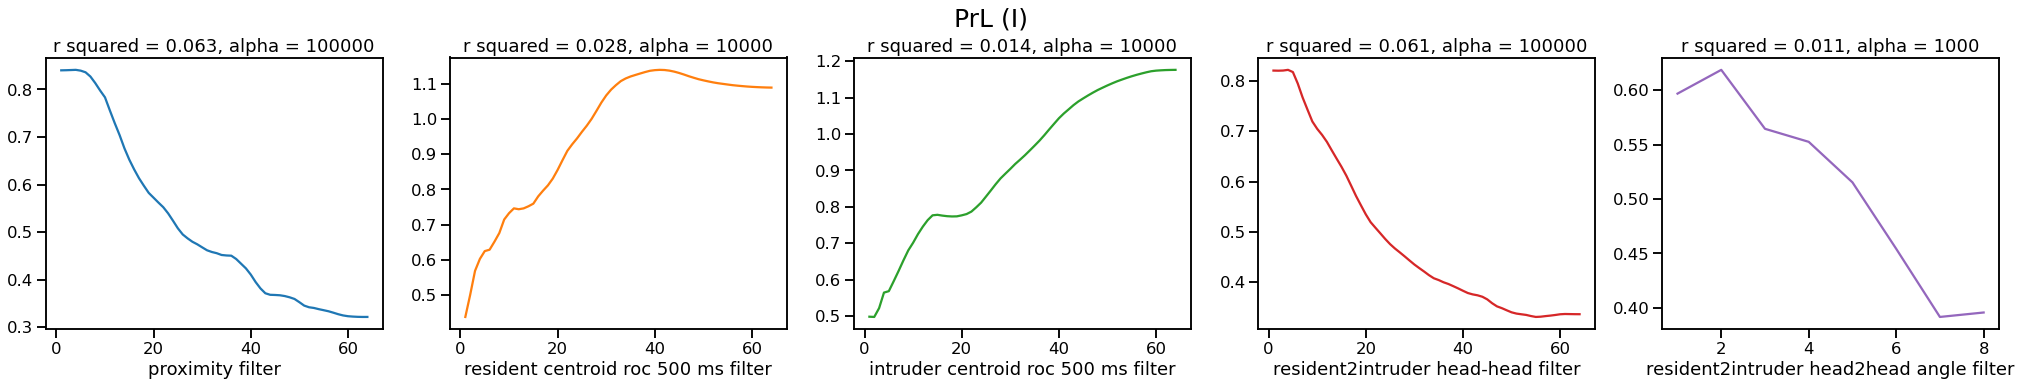

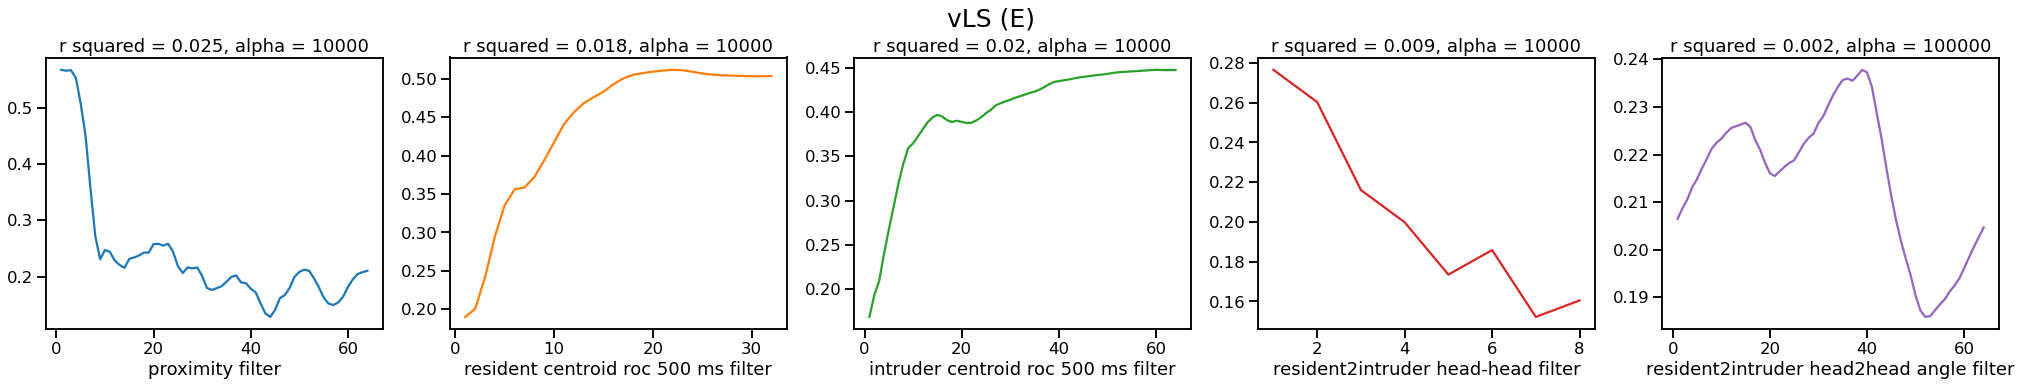

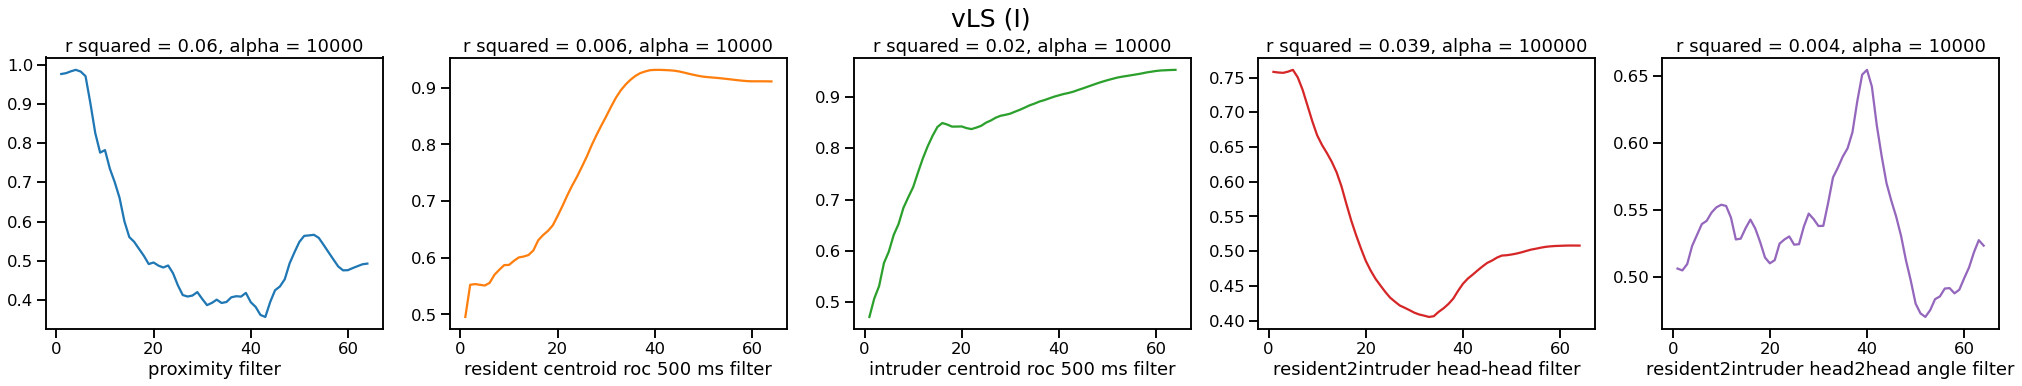

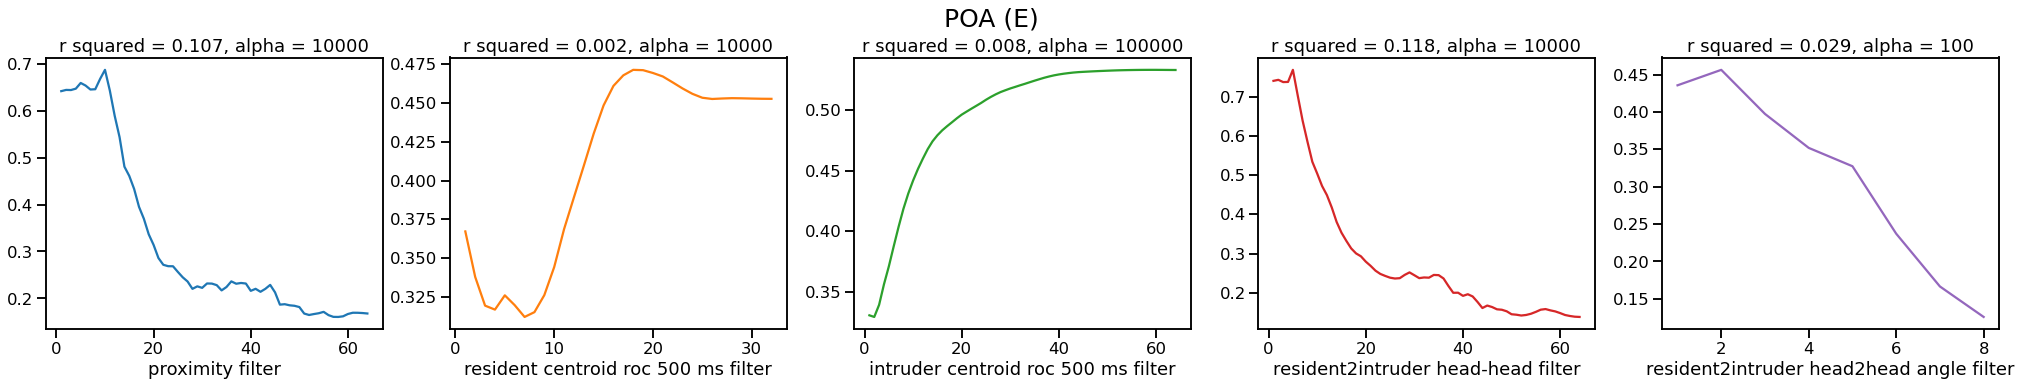

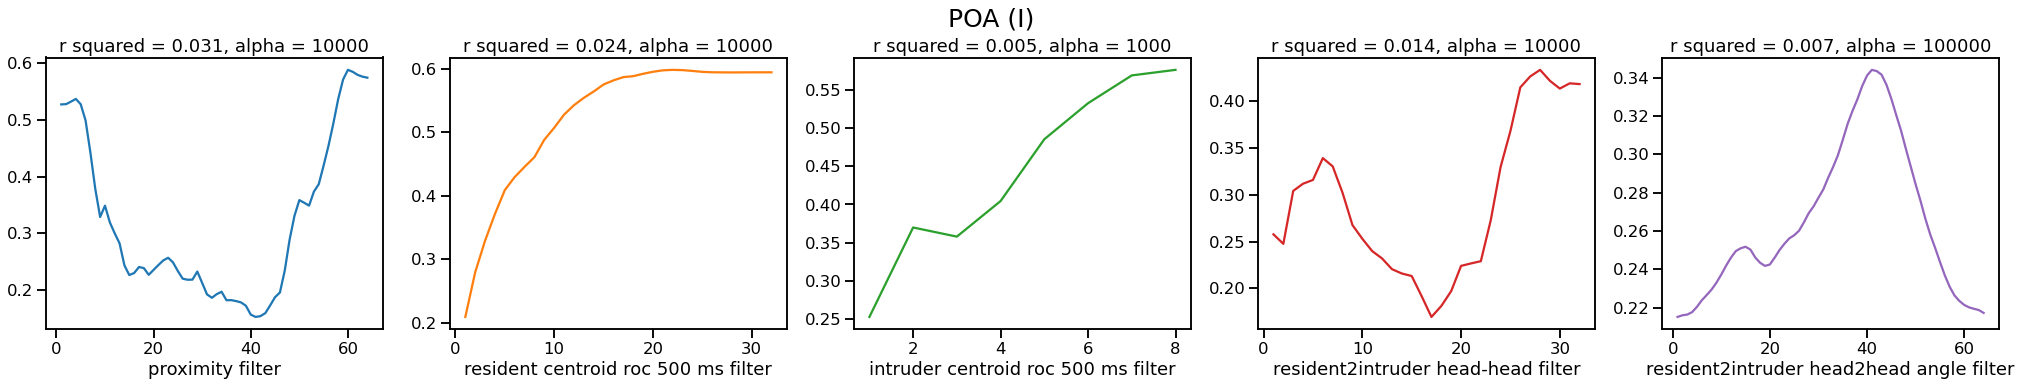

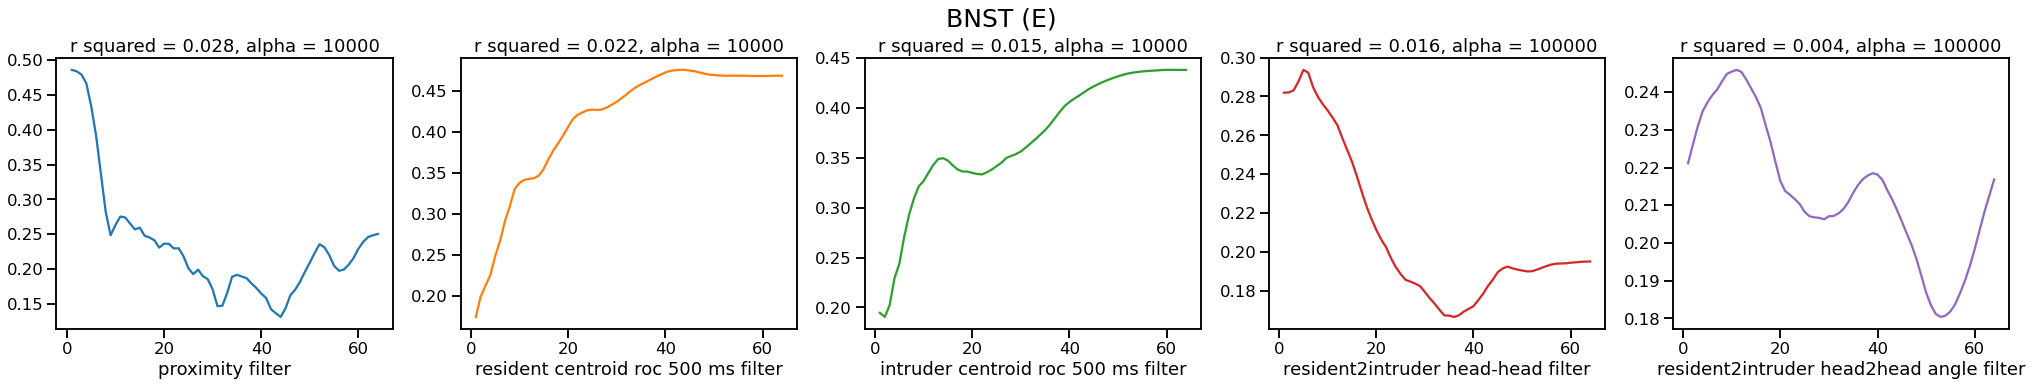

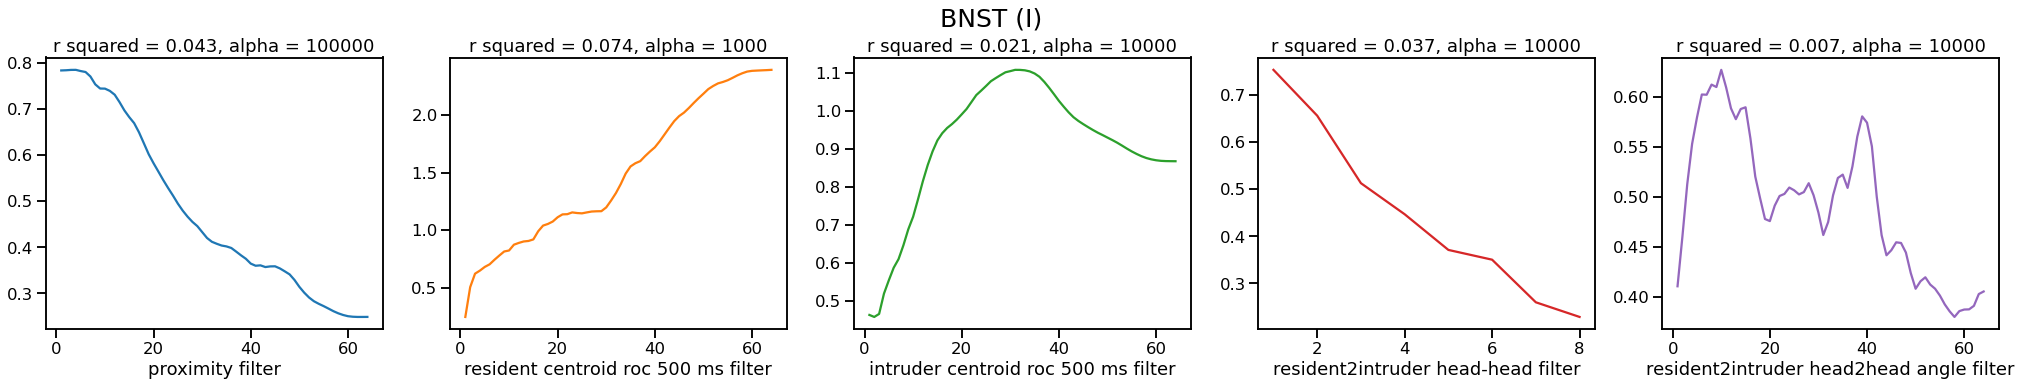

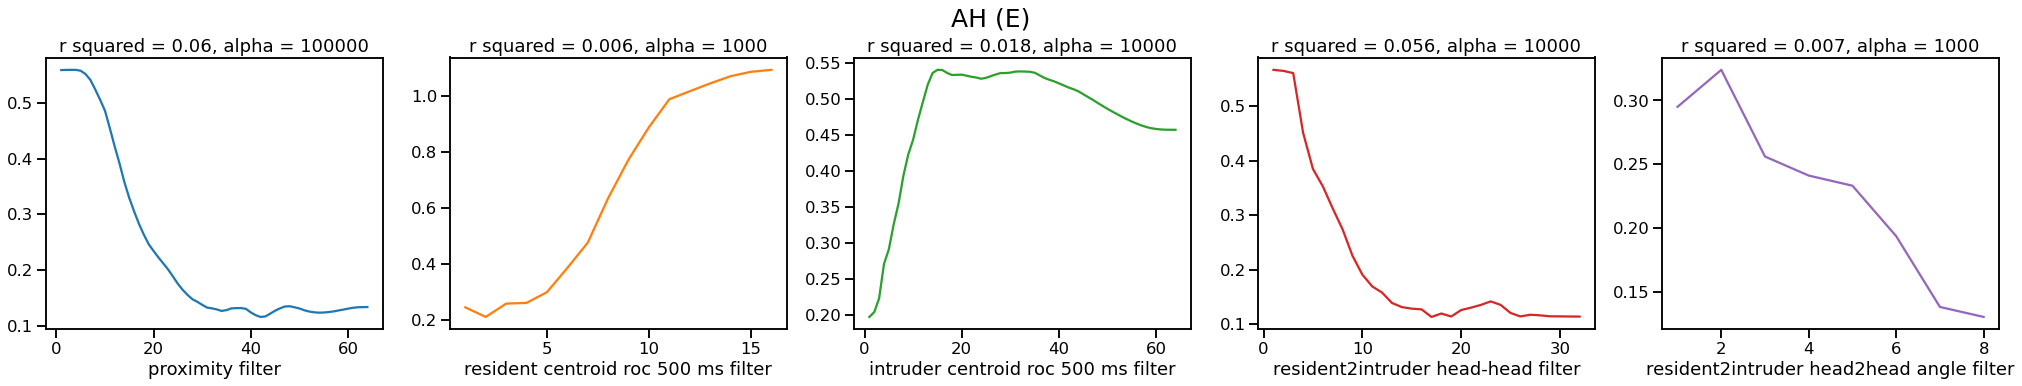

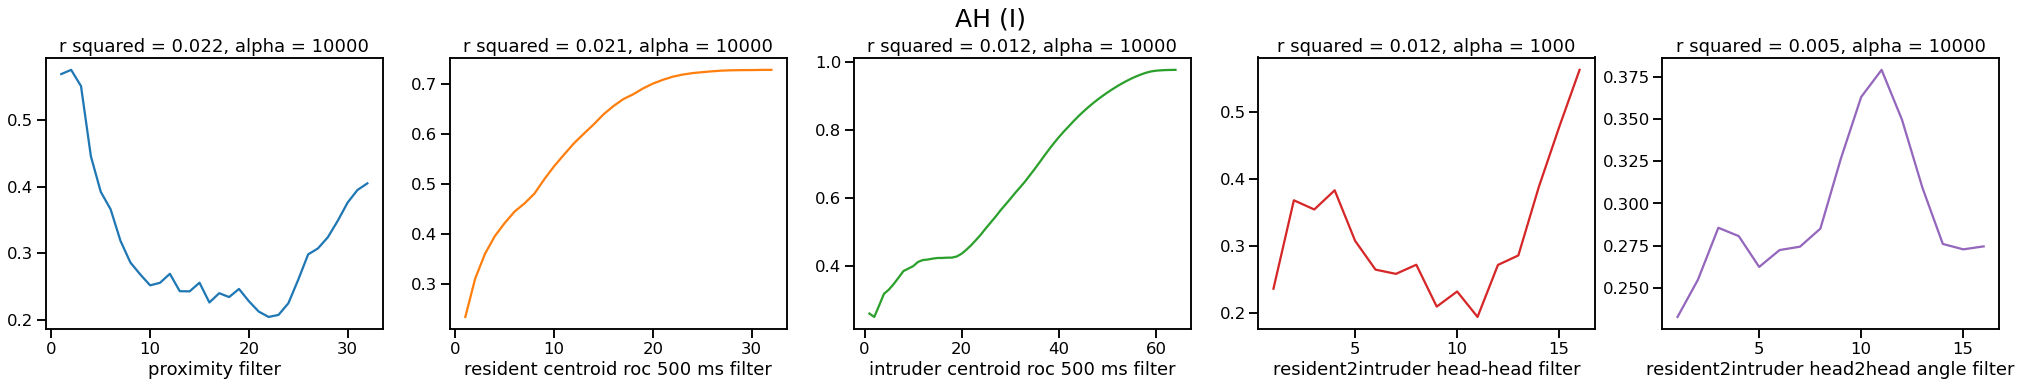

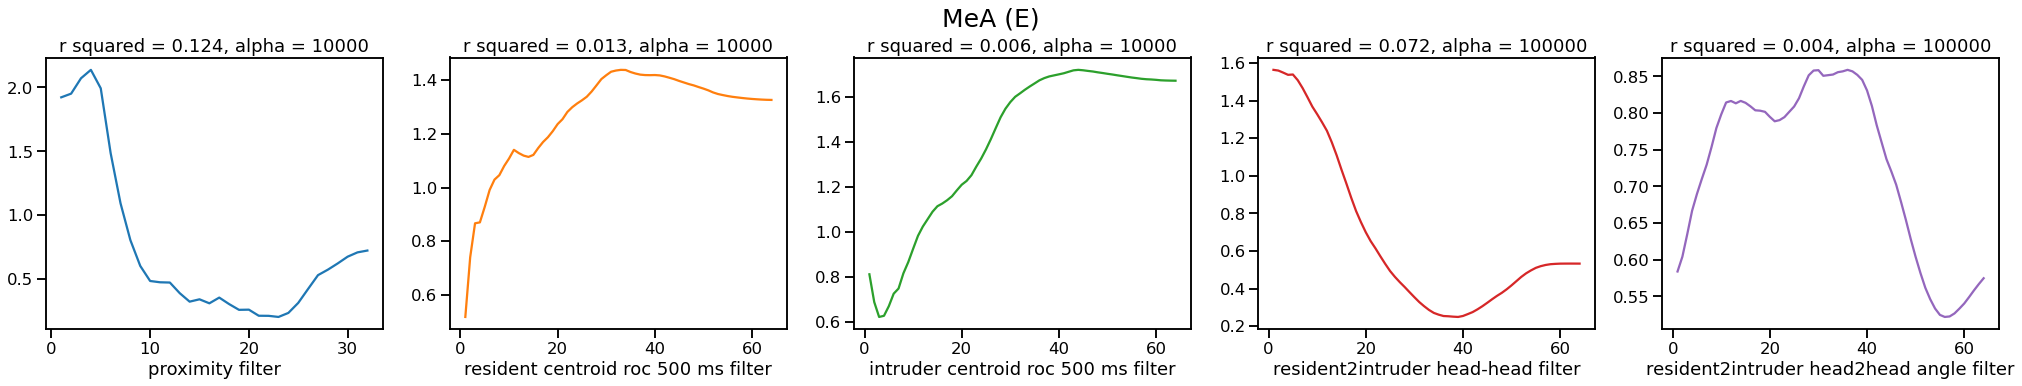

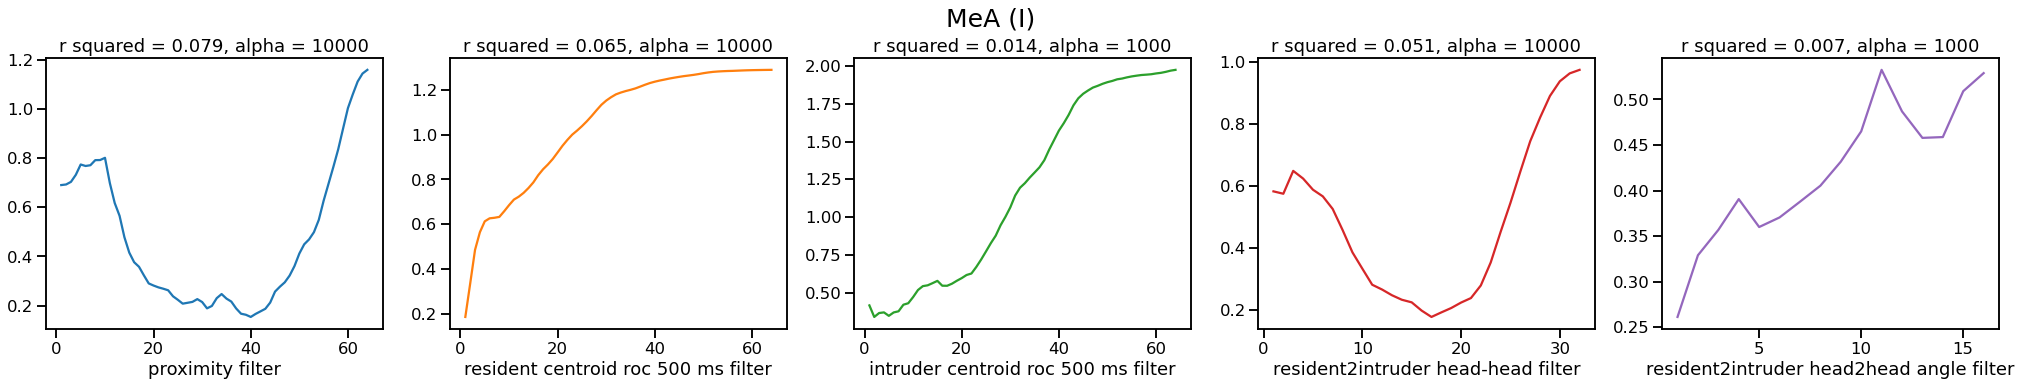

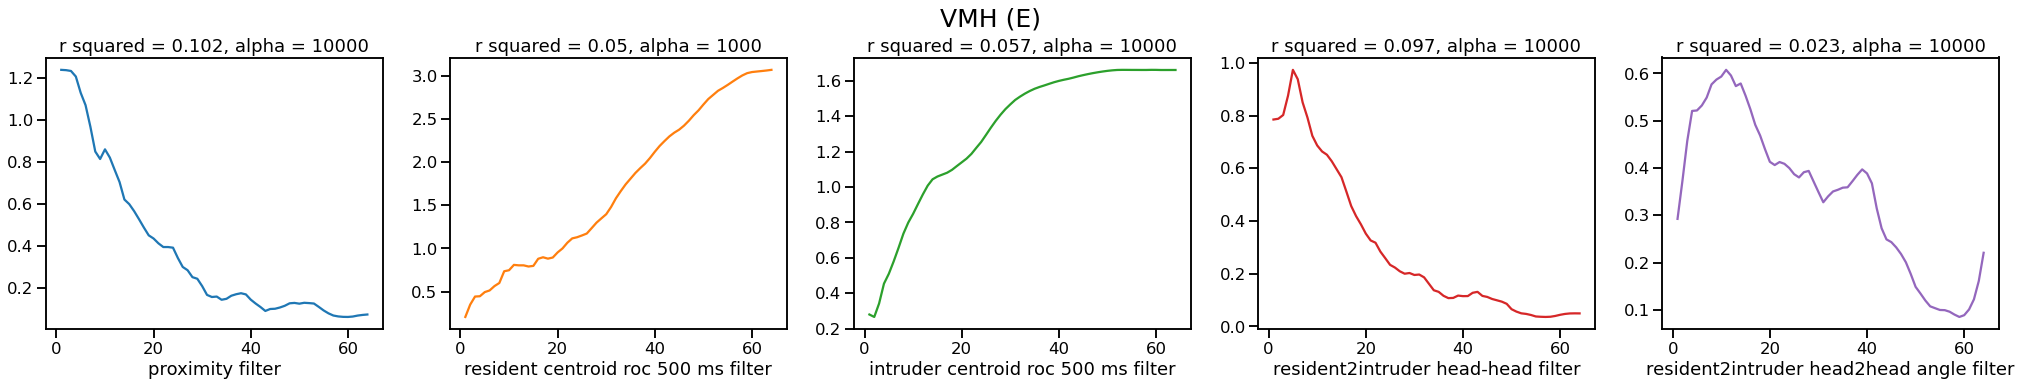

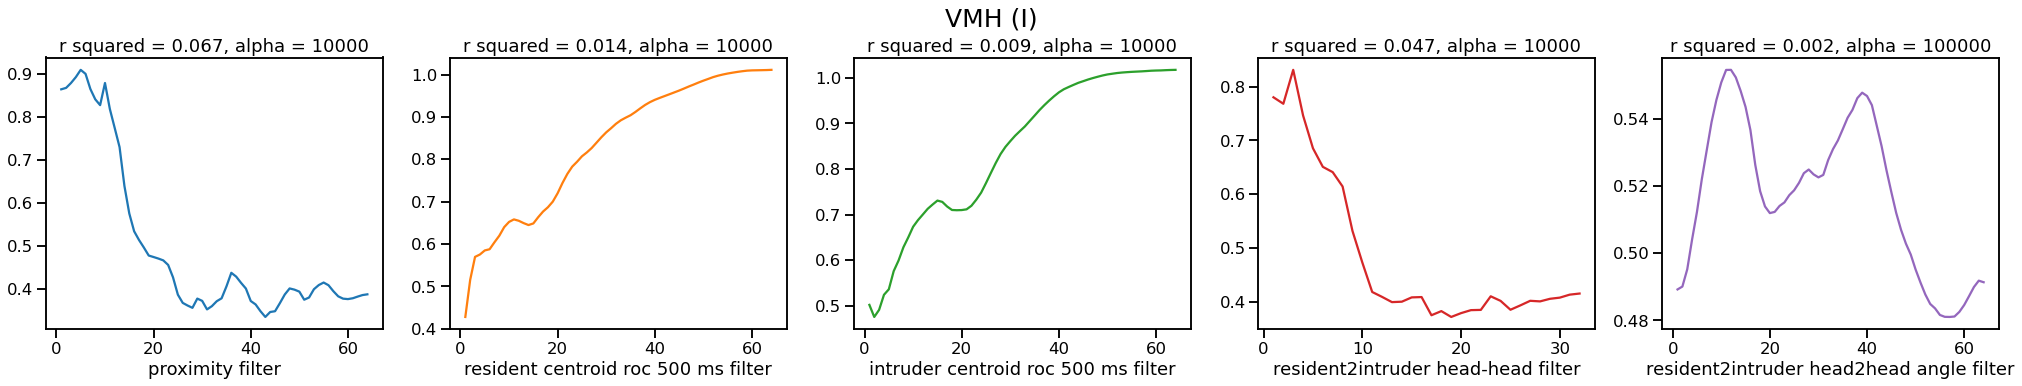

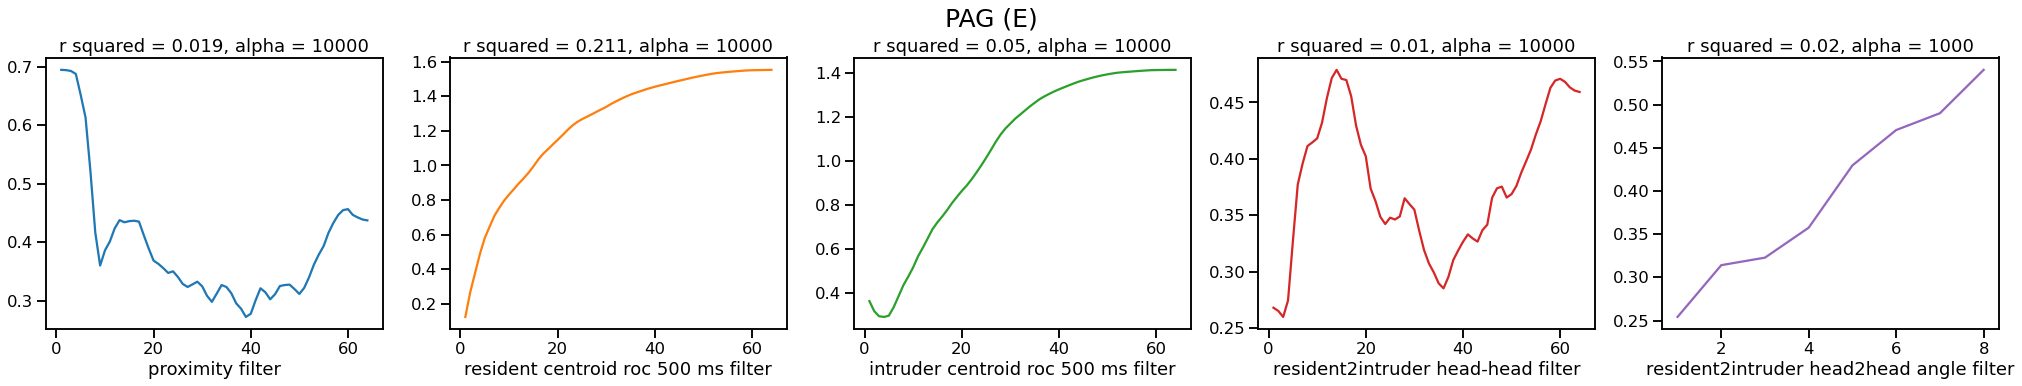

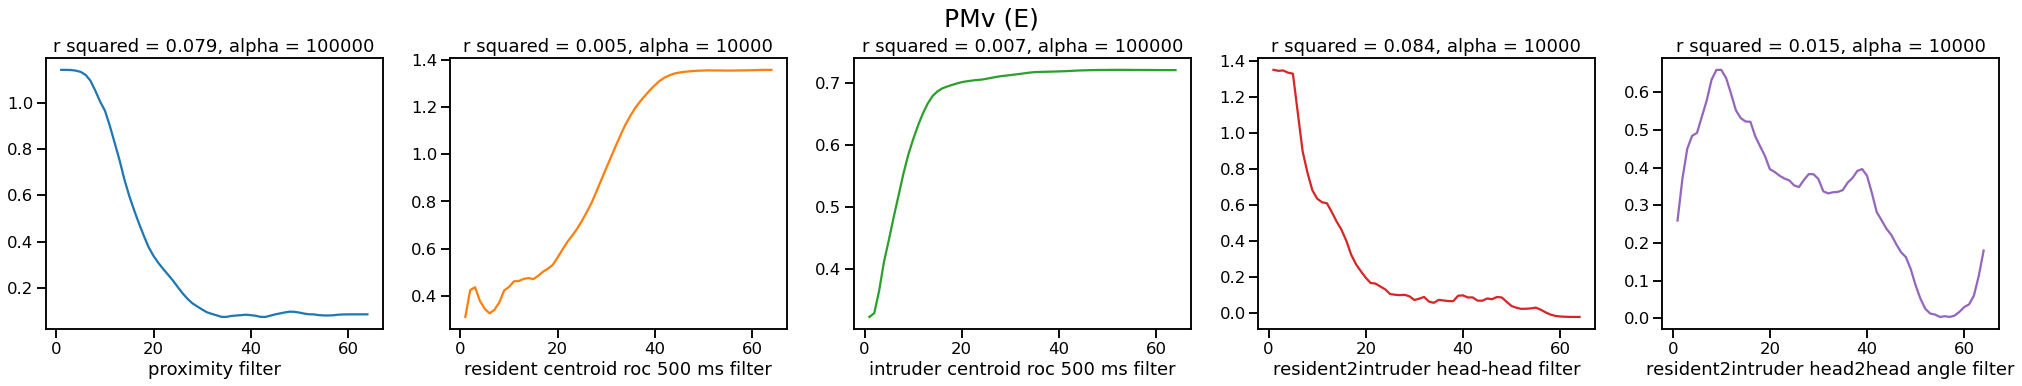

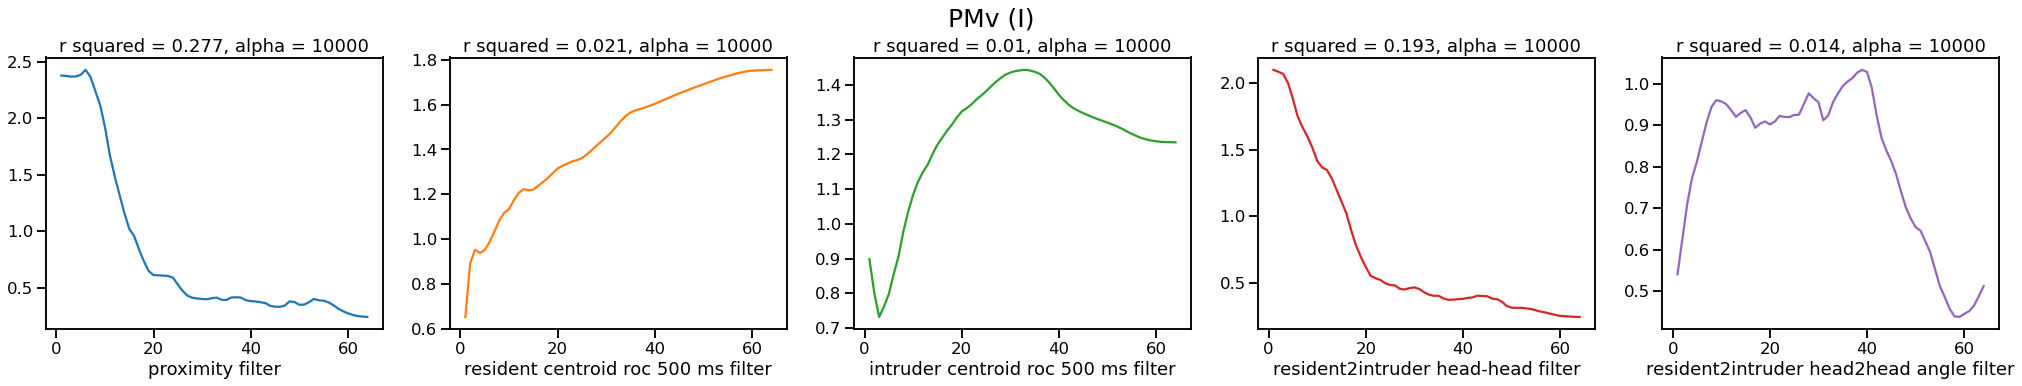

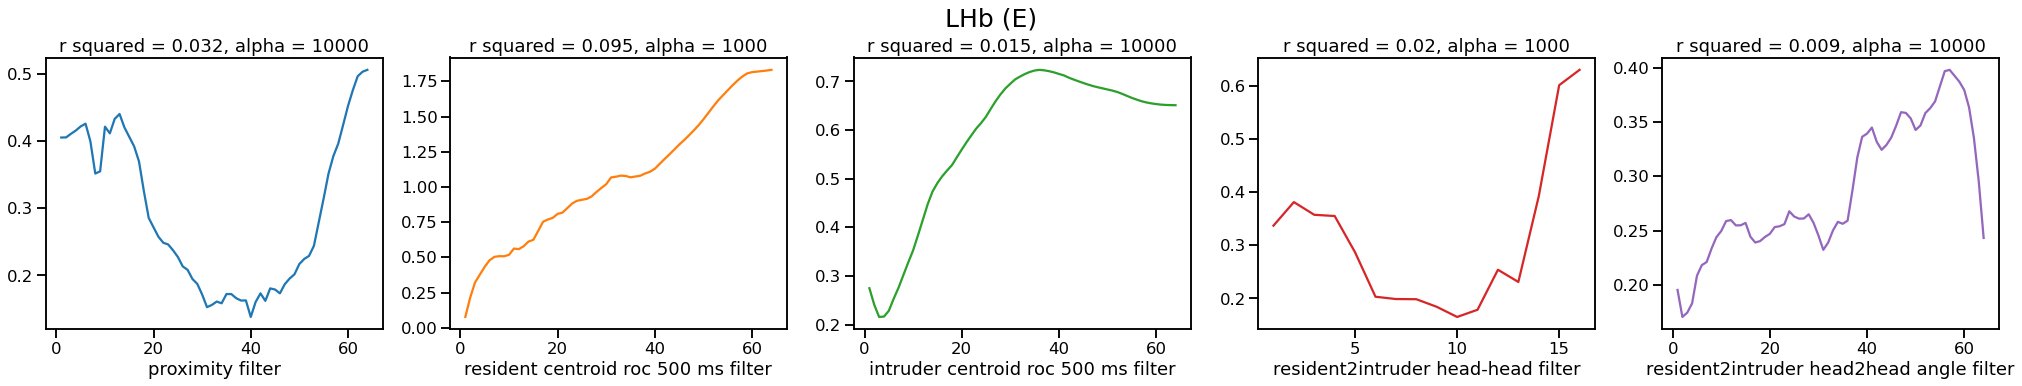

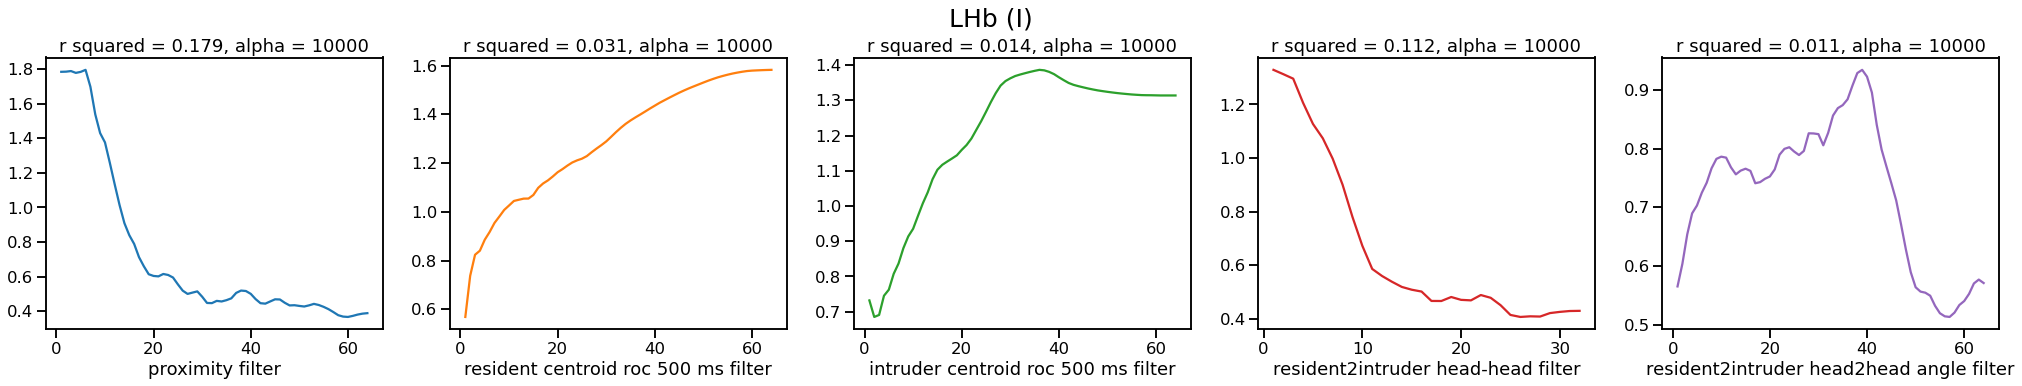

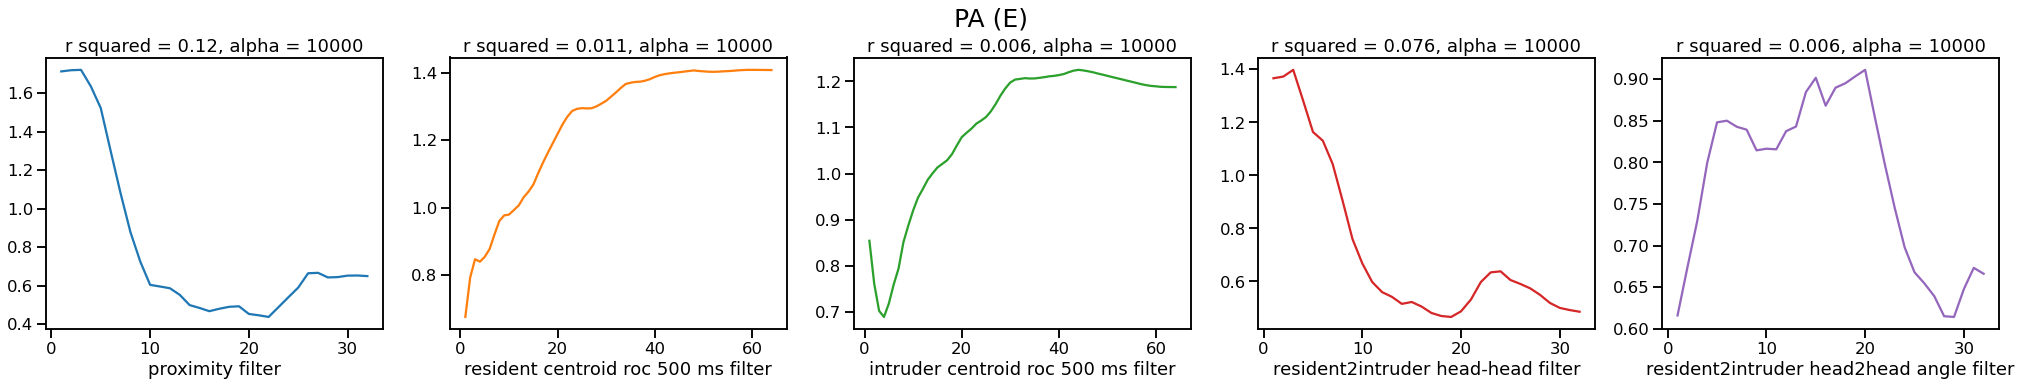

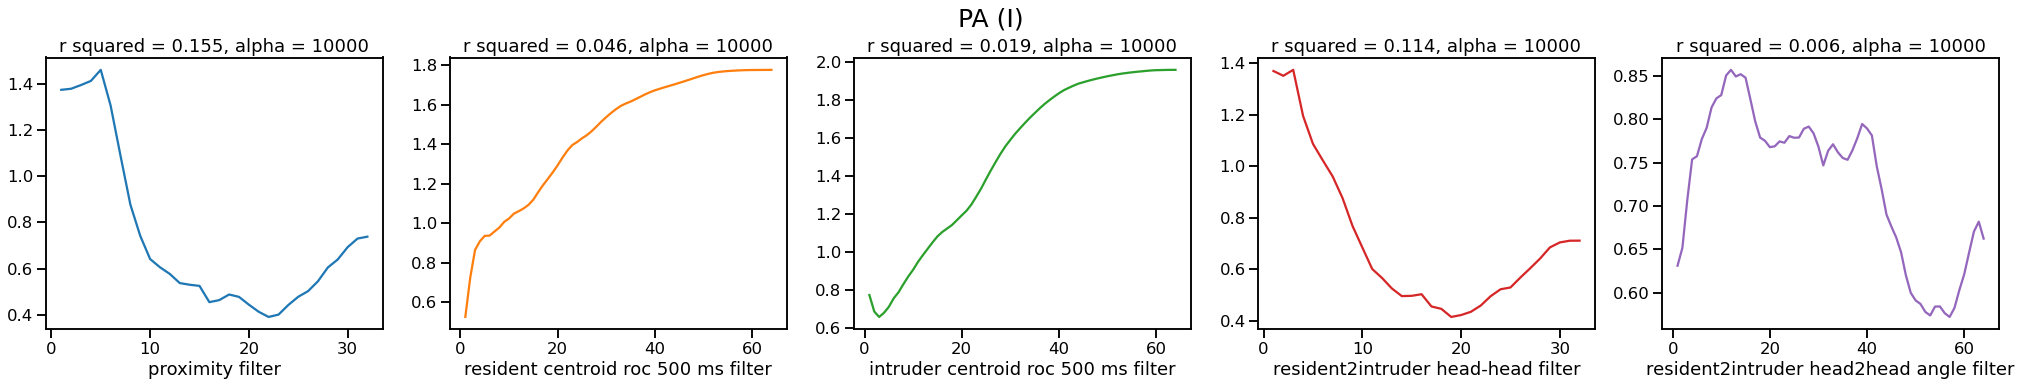

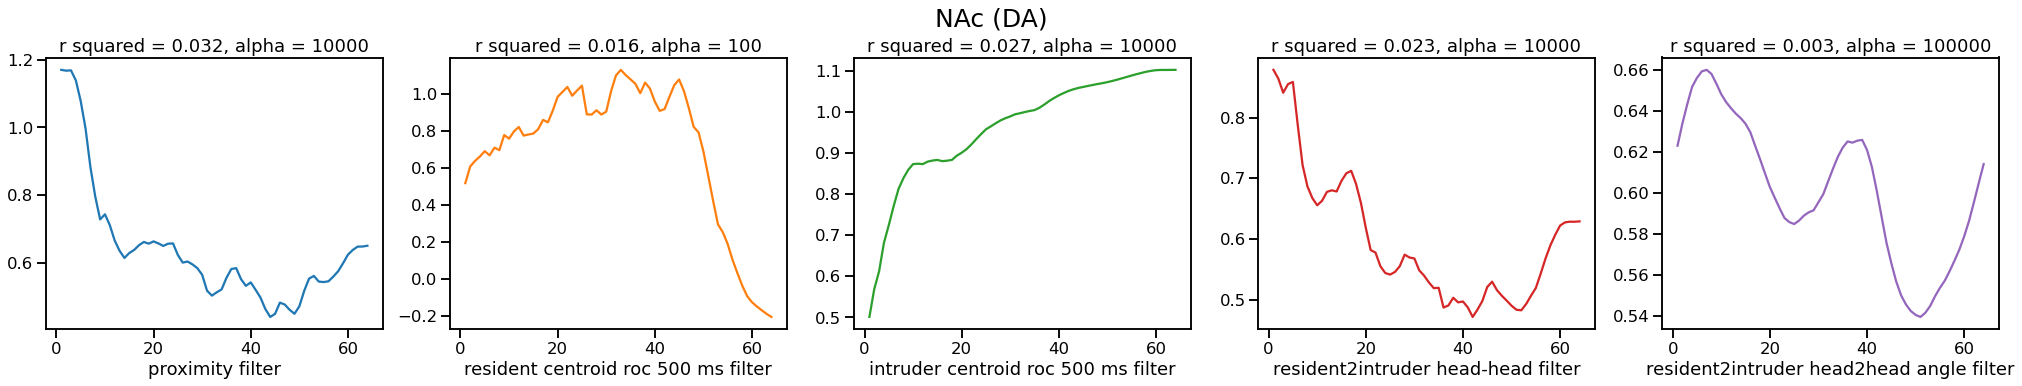

In [12]:
# MSE among cluster fits for particular animal
animal = '29L'
df = load_and_wrangle(animal)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in range(-3,7)] 
Nbin_values = [2**x for x in range(3,7)]
K = 5

for region in regions:
    fits = np.load(f'../data/{animal}/{animal}_KFold={K}_MAP-estimation_region={region}.npz', allow_pickle=True)
    W_map = fits['W_map']
    train_mse = fits['train_mse']
    test_mse = fits['test_mse']

    Y_all, _ = get_output_Y_GLM(animal, region, path=None)

    fig, axes = plt.subplots(nrows=1,ncols=len(featuresInterest_index), figsize=(len(featuresInterest_index)*7,5))
    
    for feature_ind in range(len(featuresInterest_index)): #range(len(featuresShortlist)):

        test_mse_mean = np.mean(test_mse[featuresInterest_index[feature_ind], :, :, :], axis=0)
        best_ind = np.unravel_index(np.argmin(test_mse_mean), test_mse_mean.shape)
        W_map_mean = np.mean(W_map[featuresInterest_index[feature_ind], :, best_ind[0], best_ind[1]], axis=0)

        X_all, _, _ = get_design_X_GLM_features(animal, features=[featuresShortlist[featuresInterest_index[feature_ind]]], Nbins=Nbin_values[best_ind[0]], path=None)


        r2 = compute_r_squared(X_all, Y_all, W_map_mean)

        axes[feature_ind].plot(range(1,W_map_mean.shape[0]), W_map_mean[1:], color=colormap[feature_ind]) # without bias
        # axes[feature_ind].scatter(0, W_map_mean[0], color=colormap[feature_ind])
        axes[feature_ind].set_xlabel(featuresShortlist[featuresInterest_index[feature_ind]] + ' filter')
        axes[feature_ind].set_title(f'r squared = ' + str(np.round(r2, 3)) + f', alpha = {alpha_values[best_ind[1]]}')

    fig.suptitle(str(region), size=25, y=1.02)
    plt.show()


In [9]:
# loading cluster fits
animal = '29L'
df = load_and_wrangle(animal)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in range(-4,5)] 
Nbin_values = [2**x for x in range(3,9)]
Nbin_index = 3

for region in ['BNST (E)']:#regions:
    fits = np.load(f'../data/{animal}/{animal}_KFold={K}_MAP-estimation_region={region}.npz', allow_pickle=True)
    W_map = fits['W_map']
    train_mse = fits['train_mse']
    test_mse = fits['test_mse']

    
    for ind in [0]: # range(len(featuresShortlist)):

        X_all, _, _ = get_design_X_GLM_features(animal, features=[featuresShortlist[ind]], Nbins=Nbin_values[Nbin_index], path=None)
        Y_all, _ = get_output_Y_GLM(animal, region, path=None)

        best_ind = np.argmin(test_mse[ind, Nbin_index, :])

        fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
        axes.plot(Y_all, color='gray', label='data')
        axes.plot(X_all @ W_map[ind, Nbin_index, best_ind], color='black', label='model') 
        axes.set_xlim(5000,10000)
        axes.legend()
        # axes[ind].set_title('test mse is ' + str(np.round(test_mse[ind, Nbin_index, best_ind], 3)))

        fig.suptitle(str(region), size=20)
        plt.show()

NameError: name 'K' is not defined

In [ ]:
# loading cluster fits
animal = '29L'
df = load_and_wrangle(animal)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in range(-4,5)] 
Nbin_values = [2**x for x in range(3,9)]

region = 'BNST (E)'

fits = np.load(f'../data/{animal}/{animal}_MAP-estimation_region={region}.npz', allow_pickle=True)
W_map = fits['W_map']
train_mse = fits['train_mse']
test_mse = fits['test_mse']

index = 0 # index of feature (instead of for loop over all)

best_ind = np.unravel_index(np.argmin(test_mse[ind, :, :]), test_mse[ind, :, :].shape) # finding best index across bin number and alphas
X_all, X, bin_centers = get_design_X_GLM_features(animal, [featuresShortlist[ind]], Nbin_values[best_ind[0]])
Y_all, Y = get_output_Y_GLM(animal, region)
w_MLE = W_map[ind, best_ind[0], best_ind[1]]
    
N = Nbin_values[best_ind[0]]
h = np.histogram(X_all @ w_MLE, bins=N)
y_avg = np.zeros((N))
for bin in range(0,N):
  ind_higher = np.argwhere(X_all @ w_MLE >= h[1][bin]).flatten()
  ind_lower = np.argwhere(X_all @ w_MLE < h[1][bin+1]).flatten()
  ind_bin = list(set(ind_lower).intersection(set(ind_higher)))
  y_avg[bin] = Y_all[ind_bin].sum()/len(ind_bin)
plt.scatter(X_all @ w_MLE, np.exp(X_all @ w_MLE), label='exp(x)')
plt.scatter(X_all @ w_MLE, np.log(1+np.exp(X_all @ w_MLE)), label='log(1+exp(x))')
plt.scatter(h[1][:-1], y_avg, color='red', label='avg spike count')
plt.xlabel('Xw')
plt.ylabel('f(Xw)')
plt.legend()
plt.title(region + " " + featuresShortlist[index])
plt.show()

### Soft-plus Gaussian GLM

[0.62245273 0.78907392]


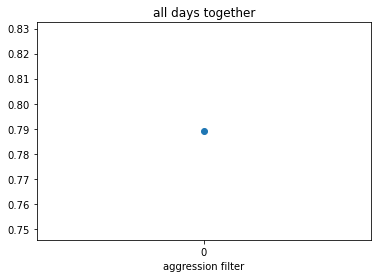

In [79]:
# Linear Gaussian GLM model 
def neglog_GLM_soft_plus_Gaussian(w, sigma, X, Y):
    f_X = np.log(1+np.exp(X @ w))
    negLl = X.shape[0]/2 * np.log(2*np.pi*sigma**2) + 1/(2*sigma**2) * np.linalg.norm(f_X-Y) ** 2
    return negLl
w_hat = scipy.optimize.minimize(neglog_GLM_soft_plus_Gaussian, w_MLE, args=(1, X_all, Y_all))['x']
print(w_hat)
plt.scatter(range(lag_minus + lag_plus ), w_hat[1:])
plt.xticks(range(lag_minus + lag_plus),range(-lag_minus,lag_plus))
plt.xlabel('aggression filter')
plt.title('all days together')
plt.show()